## Analysis to predict Breast Cancer

### Introduction

Other than skin cancer, breast cancer is the most commonly diagnosed cancer among American women. In 2019, it is estimated that about 30% of newly diagnosed cancers in women will be breast cancers. Breast Cancer occurs as a results of abnormal growth of cells in the breast tissue, known as a "Tumor". A tumor does not mean cancer - tumors can be Benign (B, not cancerous), pre-malignant (pre-cancerous), or Malignant (M, cancerous).The dataset is showing some factors that might influence breast cancer. The dataset has historic medical records of 569 patients and 32 variables. It contains 569 samples of malignant and benign tumor cells.

### Project Motivation and Goal

The labels in the data being discrete, the predication would fall into two categories, Malignant or Benign, making this is a classification problem. The goal, therefore, would be to classify whether the breast cancer is benign or malignant and predict the recurrence and non-recurrence of malignant cases after a certain period. To achieve this we will have to use certain machine learning classification methods that can predict the discrete class of a new input.

#### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report 
from pprint import pprint
from sklearn.model_selection import GridSearchCV

#### Loading the Dataset

In [2]:
data = pd.read_csv(r'C:\Users\Gaurav\Desktop\Breast Cancer\Data\breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Inspecting the Data

In [3]:
#since "id" column does not give us much information, we can drop it
data.drop('id', axis =1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

From the above results, we see that the column "diagnosis" is 569 non-null object, while the rest are float.

In [5]:
#checking for missing variables, if any
data.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [6]:
#since 'Unnamed: 32' has null values and is of no use, we'll drop it as well
data.drop('Unnamed: 32',axis=1, inplace=True)

In [7]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

We see that "diagnosis" is a categorical variable because it shows a fixed number of possible values (i.e, Malignant (M) or Benign (B)). The machine learning algorithms want numbers, and not strings, as their inputs so we will need to convert them later.

### Exploratory Data Analysis (EDA)

#### Descriptive statistics
Condensing key characteristics of the data set into simple numeric metrics, like: mean, standard deviation, correlation, etc.

In [8]:
#Calculating the descriptive statistics for each variable
#"mean" is the mean of each column and "50%" is the median
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
# Skew results in either a positive (right) or negative (left) skew value on a plot, and the values that are near 0 show less skew.

data.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

#### Visualization (Analyzing the variables separately) 
This part is important as it will give us some idea about the variables, which one plays a major role in deciding the cancer detection. It includes projecting the data into Cartesian plane or into abstract images. This part of data exploration is leveraged for preprocessing of the data, data modeling, and interpretation of results.

B    357
M    212
Name: diagnosis, dtype: int64

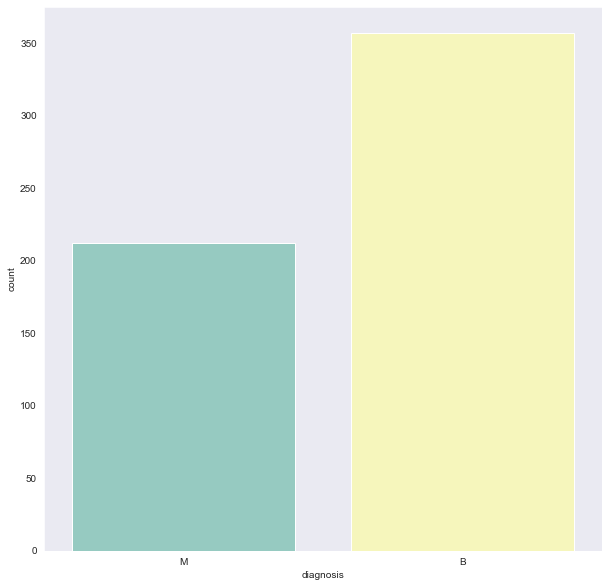

In [10]:
# frequency of cancer diagnosis (M or B)

sns.set_style("dark")
sns.set_context({"figure.figsize": (10, 10)})
ax=sns.countplot(data['diagnosis'],label='Count',palette="Set3")

data['diagnosis'].value_counts()

This shows that there are 357 patients in the data that do not have cancer cells and 212 patients that show the presence of cancer cells.

Note: I am using 3 data visualizations for plotting the data variables here: histograms, box plots, and a multimodel plot (correlation matrix).

#### Plotting the columns as groups of mean/ worst/ etc. as histograms

A histogram shows us how the data are distributed. It divides the variable into bins and counts the data points in each bin. Each bin or bar on the x-axis in the plot here represents the variable's range value (how big or small is the area_mean of the cell is, let's say), and their counts on the y-axis. 

Index(['diagnosis'], dtype='object')
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')


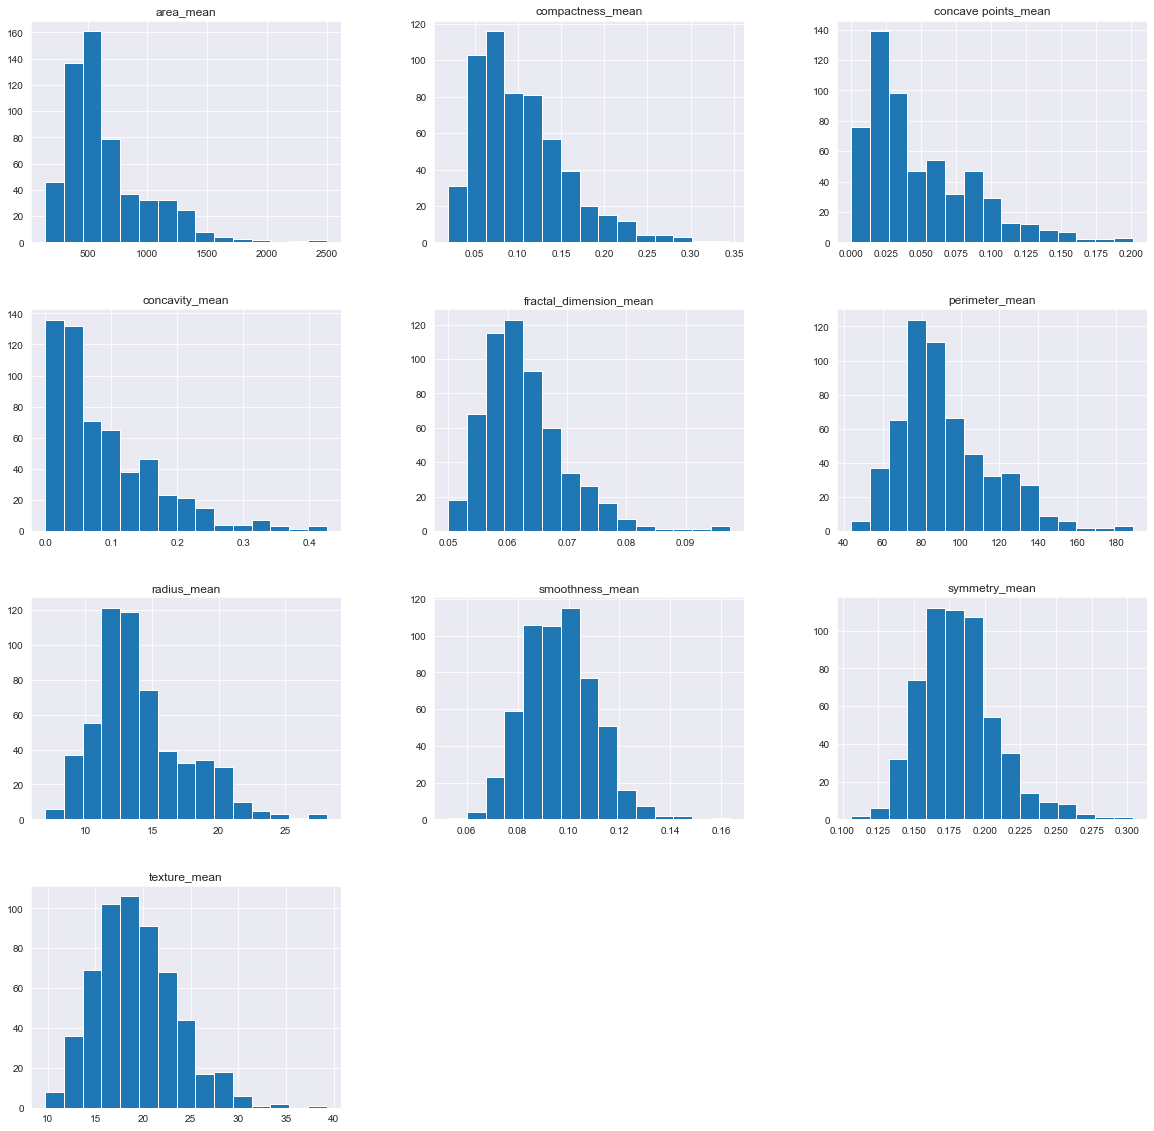

In [11]:
diag1 = data.loc[:,["diagnosis"]]

data_mean=data.iloc[:,1:11] # these locations have the variables ending in "_mean", hence a function of mean
print(diag1.columns)
print(data_mean.columns)

mean_histogram = data_mean.hist(bins=15, figsize=(20,20))

Index(['diagnosis'], dtype='object')
Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst'],
      dtype='object')


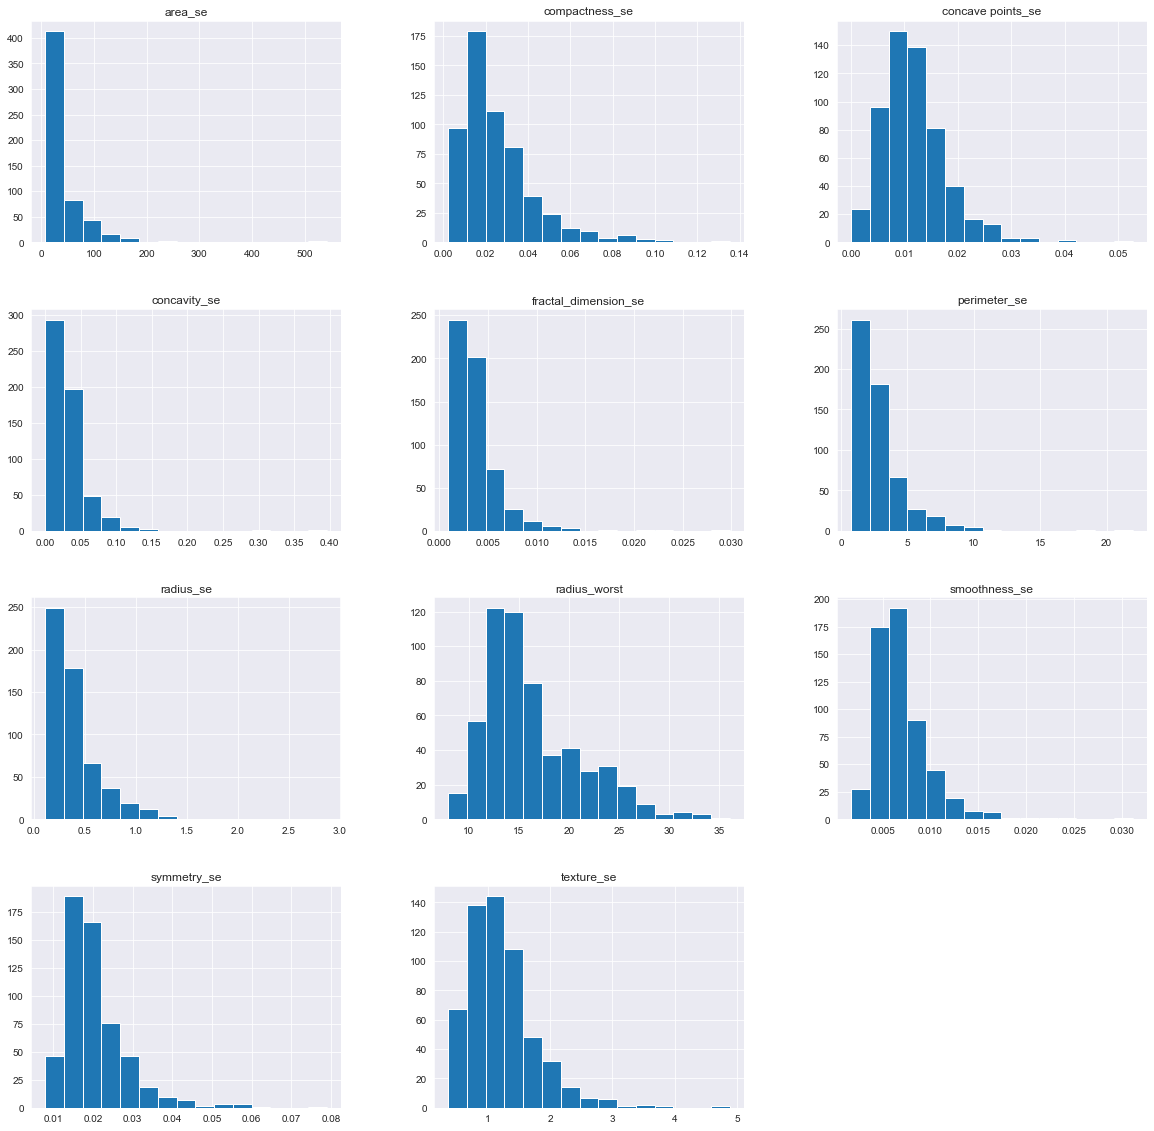

In [12]:
diag2 = data.loc[:,["diagnosis"]]

data_se = data.iloc[:,11:22] # these locations have the variables ending in "_se"
print(diag2.columns)
print(data_se.columns)

se_histogram = data_se.hist(bins=15, figsize=(20,20))

Index(['diagnosis'], dtype='object')
Index(['perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


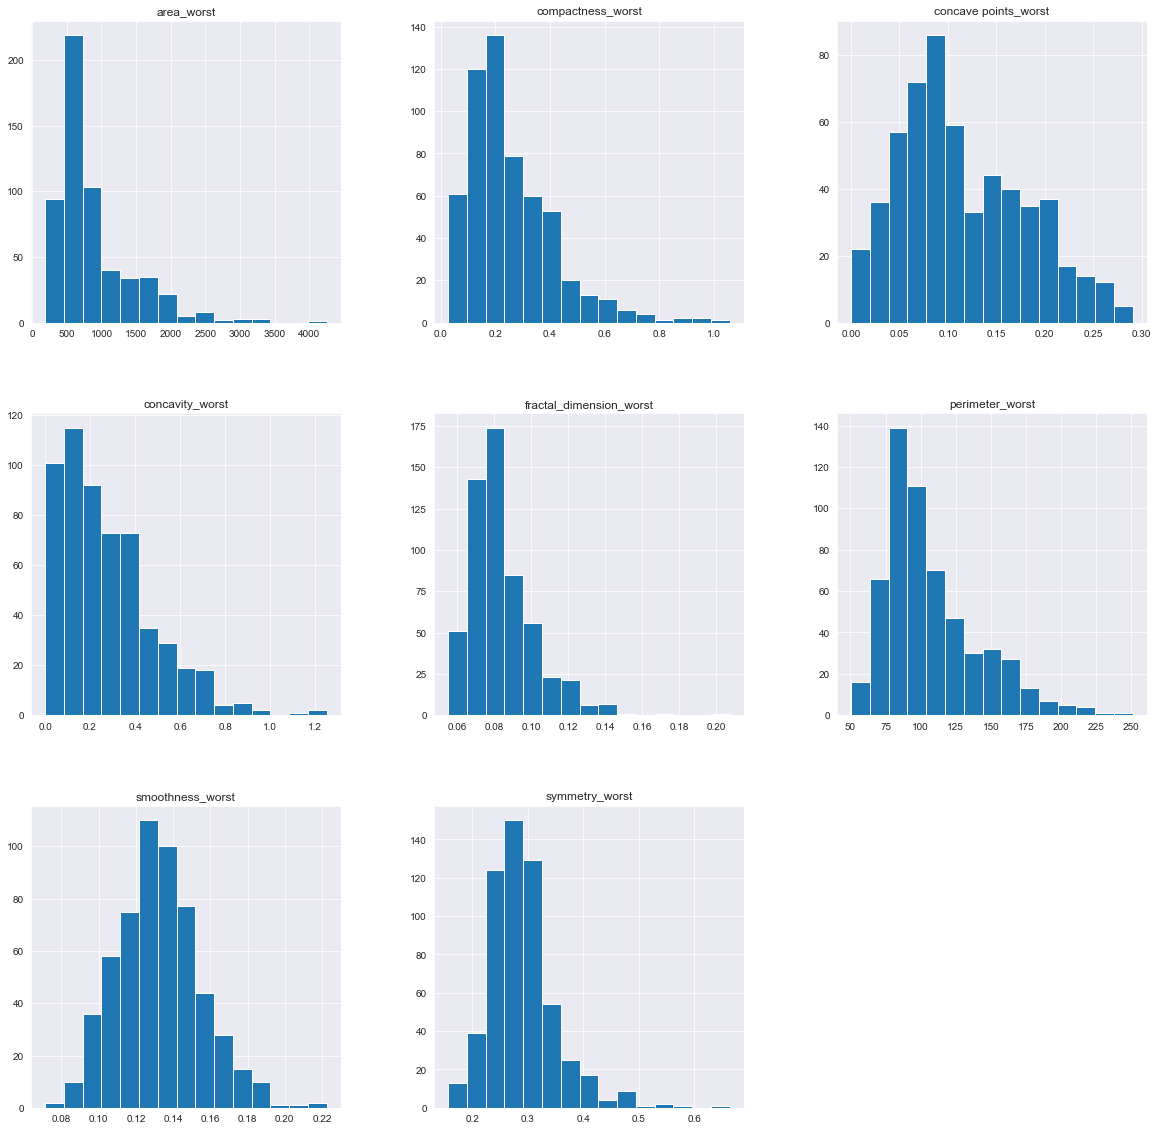

In [13]:
diag3 = data.loc[:,["diagnosis"]]

data_worst = data.iloc[:,23:] # these locations have the variables ending in "_worst"
print(diag3.columns)
print(data_worst.columns)

worst_histogram = data_worst.hist(bins=15, figsize=(20,20))

These plots show some exponential and some Gaussian distributions. These variables would be important for our further analysis because the Machine Learning techniques use these distributions on the input variables. These plots show some exponential distributions in concavity and cocaviy point, along with texture, symmetry and smoothness having a Gaussian distribution.

We can also deduce from the plots the skewness of data that we got able from the .skew() function. I am not going to correct and standardize the variables here, even if they are skewed, because I believe they might lose their meaning, and could be variables that play an important role in the prediction later. For example, from the plots we can clearly see the exponential curve of smoothness_worst, and if we refer the skewness values, it has the lowest value of all the variables, along with others. These are going to be our important variables in further analysis.

#### Plotting box plots for the data to visualize the distribution 

A boxplot is a graph that gives us a good indication of how the values in the data are spread out.
Boxplots are a standardized way of showing the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). The dots placed past the line edges or the notch, indicate the outliers. "Outliers" are extreme values in a set of data which are much higher or lower than the other numbers. The "whiskers" above and below the box show the locations of the minimum and maximum. Real datasets, like this one, displays surprisingly high maximums or surprisingly low minimums, which are the outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x2383f9d3c88>,
 'caps': [<matplotlib.lines.Line2D at 0x2383f9e43c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2383f9d3828>,
 'medians': [<matplotlib.lines.Line2D at 0x2383f9e4ac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x2383f9e4e48>,
 'means': []}

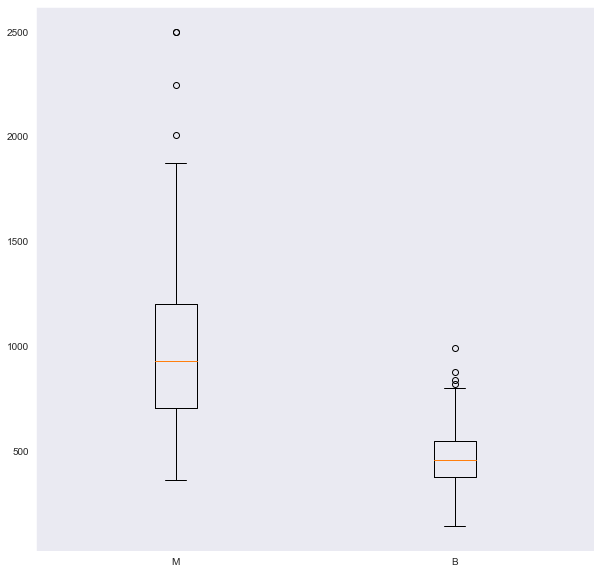

In [14]:
malignant = data[data['diagnosis']=='M']['area_mean']
benign = data[data['diagnosis']=='B']['area_mean']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([malignant,benign], labels=['M', 'B'])

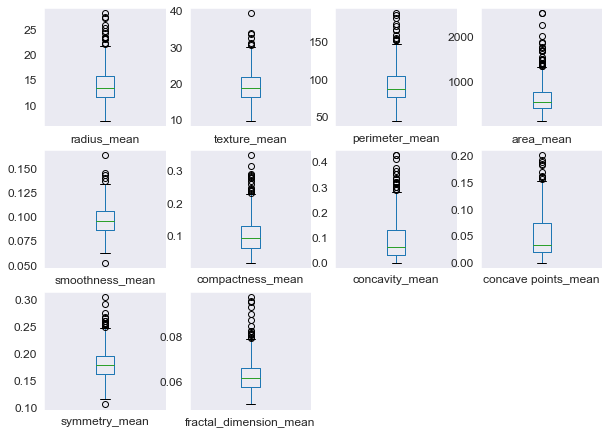

In [15]:
#box plot for "_mean" suffix variables in data
box_plot = data_mean.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, fontsize = 12)

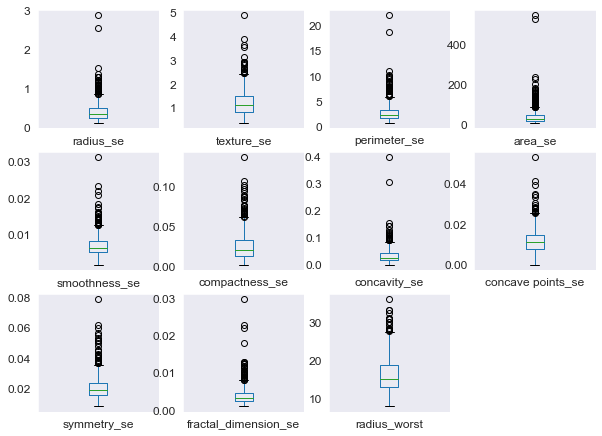

In [16]:
#box plot for "_se" suffix variables in data
box_plot = data_se.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, fontsize = 12)

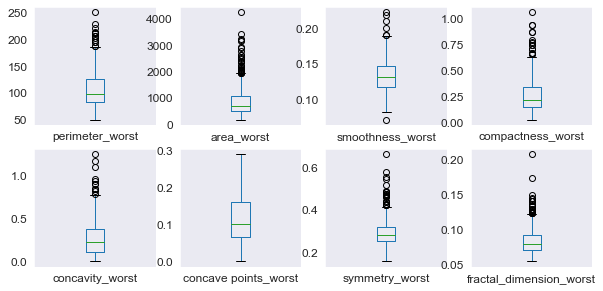

In [17]:
#box plot for "_worst" suffix variables in data
box_plot = data_worst.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, fontsize = 12)

Using the graph, we can compare the range and distribution of different variables for malignant and benign diagnosis.
Wherever the notches in the boxplots do not overlap, we can conclude that with 95% confidence, that the true medians do differ.
We can also tell if the data is skewed or not, or if it is skewed to the left or right, depending upon where the median cuts the box into two unequal pieces (or not). This is not really that useful for us here.

These box plots show that some attributes have a normal distribution while other like radius, area, compactness, concavity may have an exponential distribution, along with the gaussian distributions in the texture, smoothness and symmetry attributes.
Though we can deduce for sure that there are a few outliers in our data that are way off from the maximum and minimum, which are not necessarily useful for this analysis. These are the data points that are shown as dots above the clustered dots, and present for every variable that is ploted against the Dependent variable (Malignant or Benign).

I am not going to correct/standardize the variables that show outliers here as well, even if they are skewed, because again, they might lose their meaning, and could be variables that play an important role in the prediction later. 

#### Plotting correlation matrix for the data to show a multimodel visualization

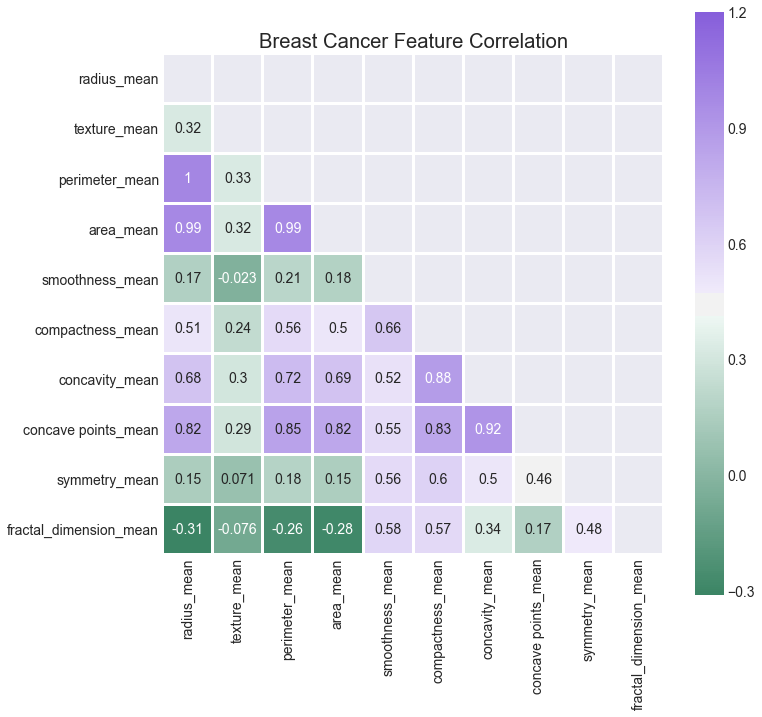

In [18]:
plt.style.use('fivethirtyeight')
sns.set_style("dark")

data1 = pd.read_csv(r'C:\Users\Gaurav\Desktop\Breast Cancer\Data\breast-cancer.csv', index_col=False)
#list = ['Unnamed: 32', 'id']
data1.drop('Unnamed: 32', axis=1, inplace=True)
data2 = data1

# Correlation matrix for the mean data
corr = data_mean.corr()

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

data1, ax = plt.subplots(figsize=(10, 10))
plt.title('Breast Cancer Feature Correlation')

# Custom diverging colormap
cmap = sns.diverging_palette(150, 275, as_cmap=True)

# Heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

Note:

Here, upon obersving the correlation plot, we can draw a strong positive relationship with mean values paramaters between 1-0.75. The mean area of the tissue nucleus has a strong positive correlation with mean values of radius and parameter. Similarly, there is a strong negative correlation between fractal_dimension with radius, texture, parameter mean values.
We are going to remove these variables with a very high correlation in further steps, as these variables are very correlated to each other, and hence keeping both of them is not necessarily going to make much difference in our predictions. Furthermore, will help reduce variables and make an accurate prediction for Malignant or Benign cancer cells. 

In [19]:
data2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


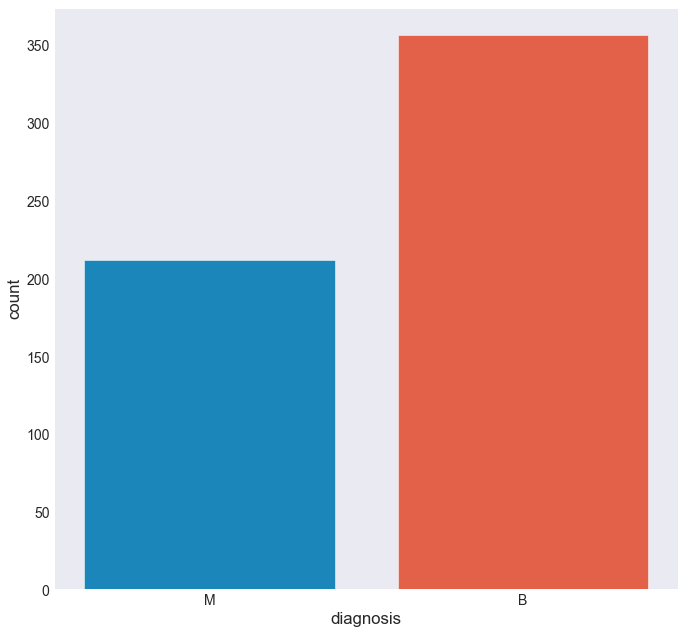

In [20]:
#Getting the values of M & B again to use in the correlation and do feature selection 
y = data['diagnosis']
ax = sns.countplot(y,label="Count")  

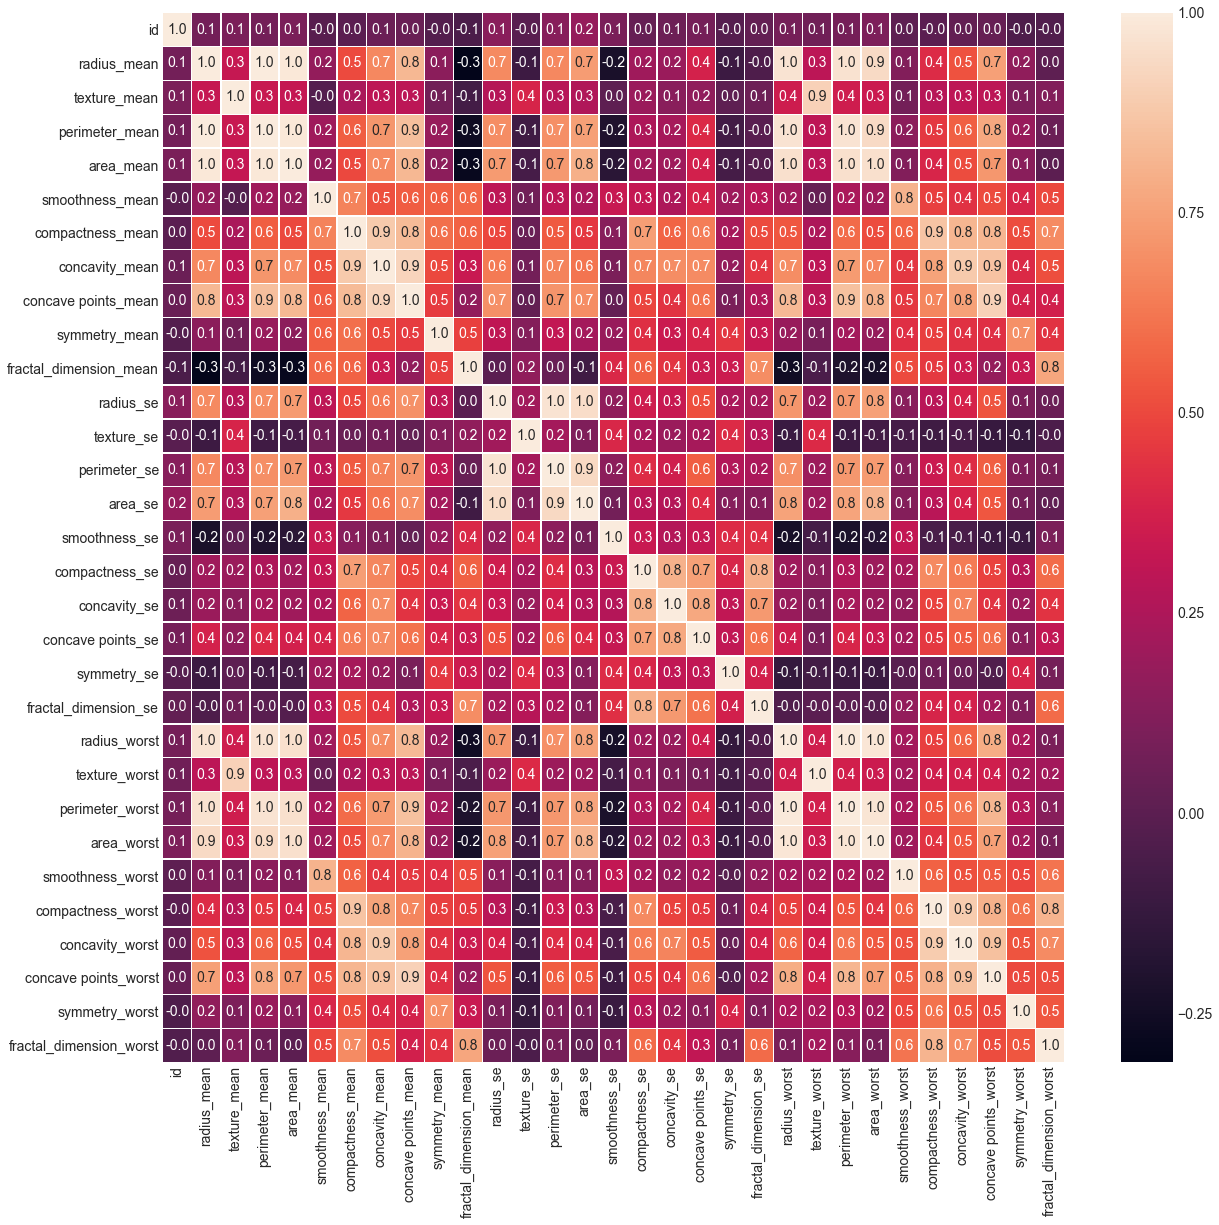

In [21]:
#Heatmap is a powerful plot method and we will use it to plot the data to find all the correlations
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data2.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

#### Feature Selection from Correlation Matrix

Here, we find all the correlated features and check the accuracy with random forest classifier thereafter.
As it can be seen in the heatmap heat figure radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only area_mean. I am setting a threshold of correlation above 0.9 as the cut-off for acceptance of a variable. Therefore, we'd keep the correlated variables if only their correlation is less than 0.9. Keeping thsi in mind, we see a correlation between concavity_mean and concavity_worst as well, so I'll keep concavity_mean here. 

Furthermore, Compactness_mean, concavity_mean and concave points_mean are correlated with each other as well. Hence, I only choose concavity_mean. Next, radius_se, perimeter_se and area_se are correlated, I'll only use area_se. radius_worst, perimeter_worst and area_worst are correlated so I'll use area_worst. Compactness_worst, concavity_worst and concave points_worst so I use concavity_worst. Compactness_se, concavity_se and concave points_se so I use concavity_se. texture_mean and texture_worst are correlated and I use texture_mean. area_worst and area_mean are correlated, so I used area_mean.

In [22]:
#dropping the correlated variables
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concavity_worst', 'concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
df_new = data2.drop(drop_list1,axis = 1 )  
df_new.head()

,id,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.4601,0.11890
1,842517,M,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2750,0.08902
2,84300903,M,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.3613,0.08758
3,84348301,M,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6638,0.17300
4,84358402,M,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.2364,0.07678


In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 17 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
texture_mean               569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
concavity_mean             569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
texture_se                 569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
concavity_se               569 non-null float64
symmetry_se                569 non-null float64
fractal_dimension_se       569 non-null float64
smoothness_worst           569 non-null float64
symmetry_worst             569 non-null float64
fractal_dimension_worst    569 non-null float64
dtypes: float64(15), int64(1), object(1)
memory usage: 75.6+ KB


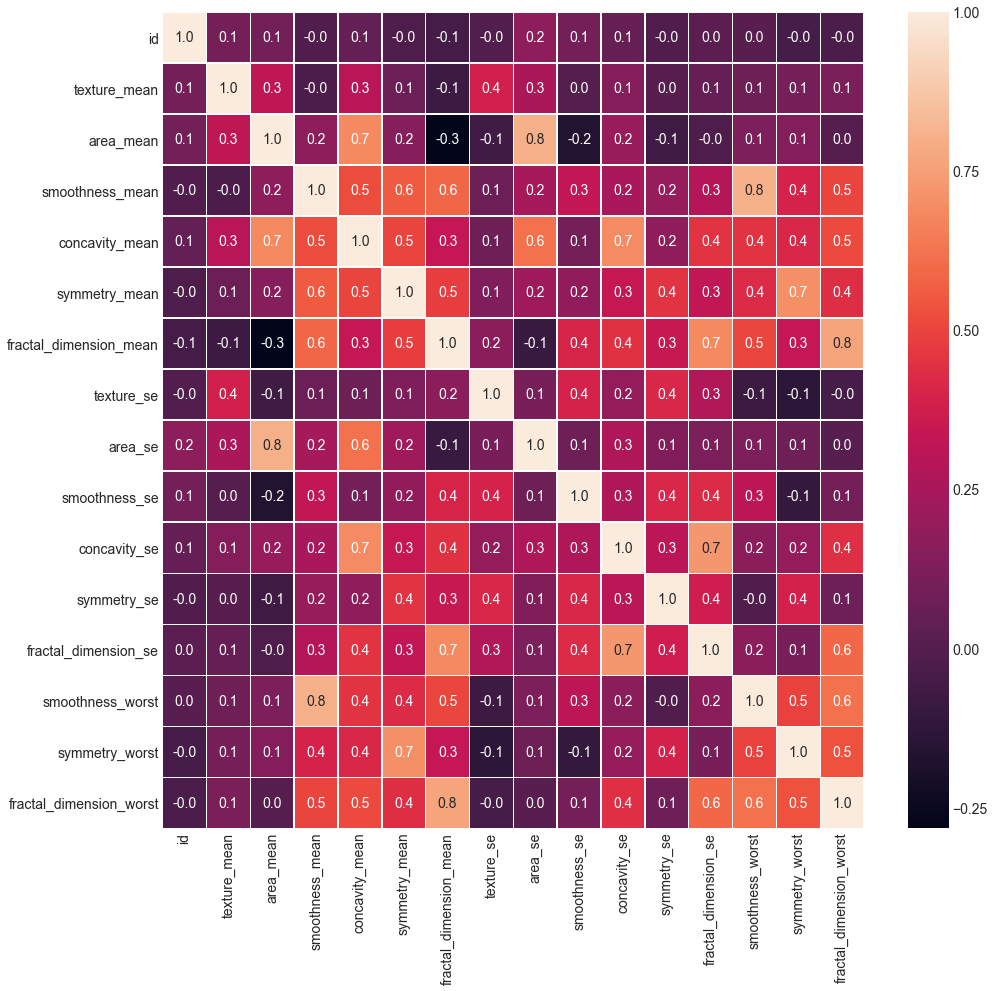

In [24]:
#new correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df_new.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

#### Scatter Plot

Plotting a scatter plot to visualize the data before further analysis.
Scatter plot helps in visualizing 2 numeric variables. It helps in identifying the relationship of the data with each variable i.e correlation or trend patterns. It also helps in detecting outliers in the plot.

In [25]:
d_1 = df_new
d_1.head()

,id,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.4601,0.11890
1,842517,M,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2750,0.08902
2,84300903,M,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.3613,0.08758
3,84348301,M,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6638,0.17300
4,84358402,M,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.2364,0.07678


In [26]:
df_new.head()
#d_1.shape

,id,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.4601,0.11890
1,842517,M,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2750,0.08902
2,84300903,M,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.3613,0.08758
3,84348301,M,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6638,0.17300
4,84358402,M,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.2364,0.07678


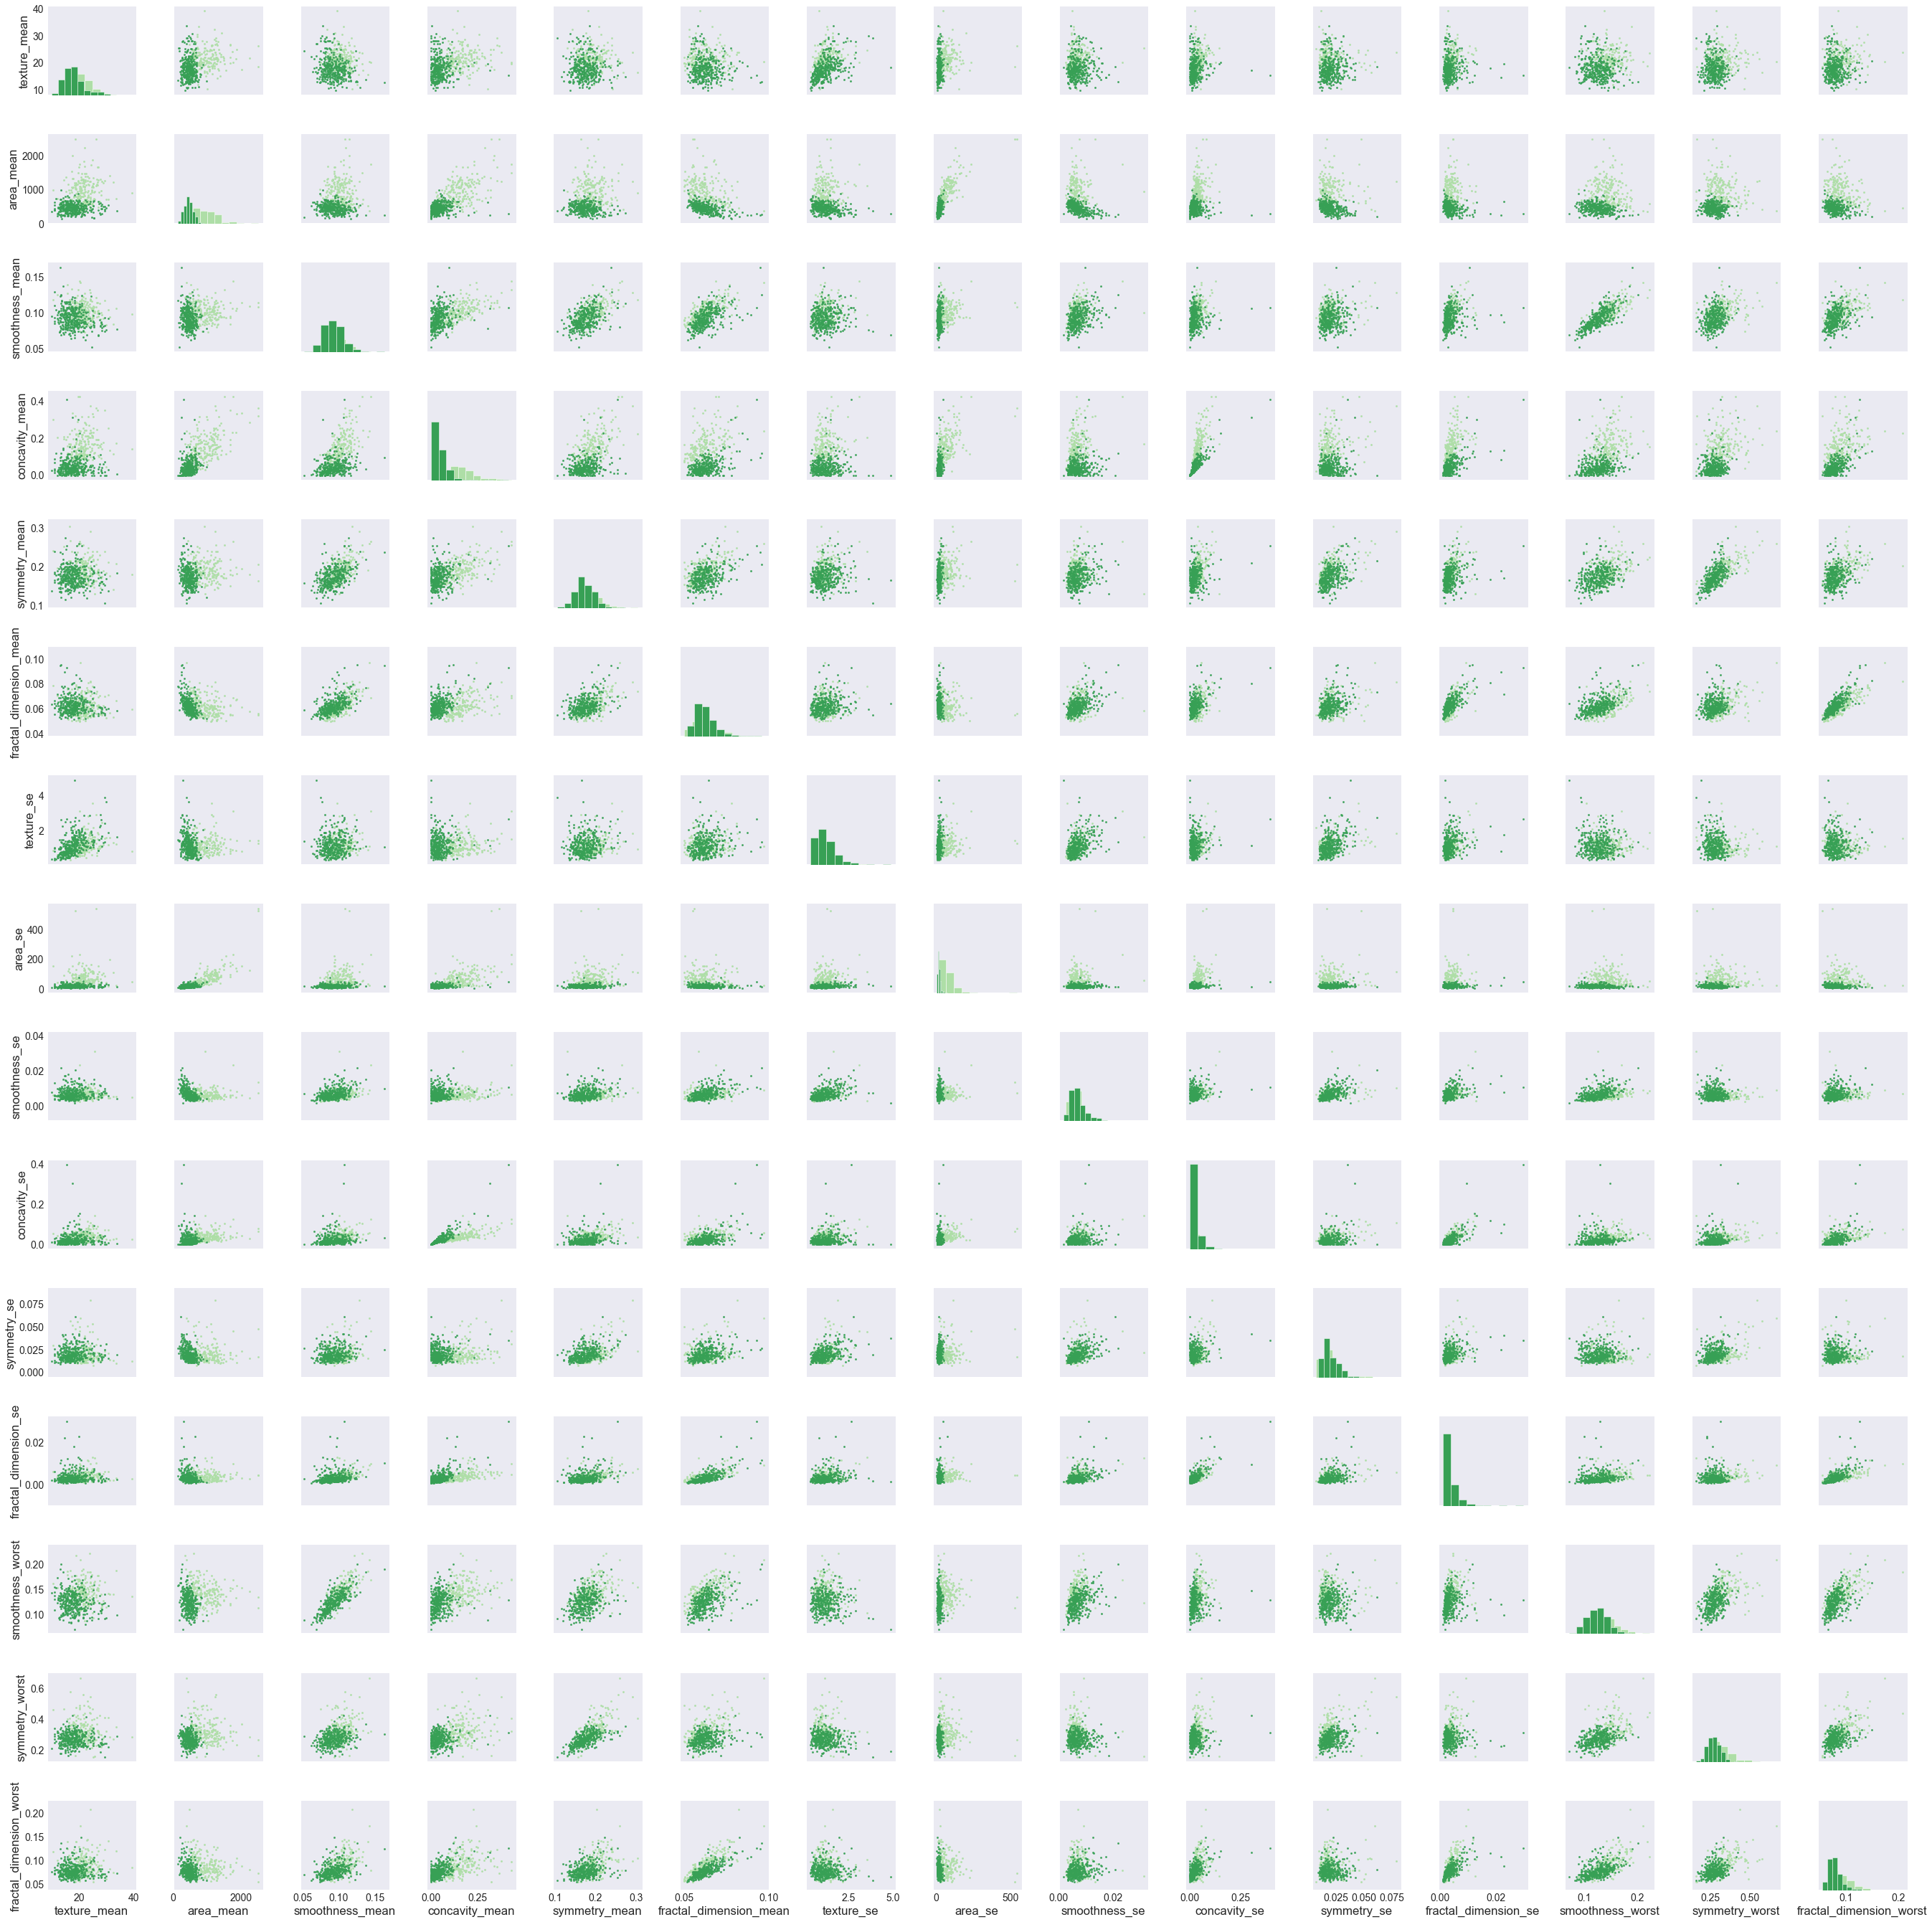

In [27]:
d_1 = df_new
d_2 = d_1
sns.set_style("dark")

scatter = sns.PairGrid(d_1[[d_1.columns[1],d_1.columns[2],d_1.columns[3],
                     d_1.columns[4], d_1.columns[5],d_1.columns[6],d_1.columns[7],d_1.columns[8],d_1.columns[9],d_1.columns[10],d_1.columns[11],d_1.columns[12],d_1.columns[13],d_1.columns[14],d_1.columns[15],d_1.columns[16]]],hue='diagnosis', palette="Greens")
scatter = scatter.map_diag(plt.hist)
scatter = scatter.map_offdiag(plt.scatter, s = 5)

Note: 

Mean values of cell radius, area, perimeter, compactness, concavity and concave points can be used in classification of the Malignant cancer cells from Benign. Larger values of these parameters tends to show a correlation with Malignant tumors and distinguish them from the Benign. Also, the mean values of texture, and smoothness, symmetry or fractual dimension does not show a distinct and particular preference of one diagnosis over the other, they overlap. There are no further noticeable large outliers in the histograms that show any distinction. I am going to keep the outliers for now, because of the same reason again. 

Outliers are unimportant if they capture inaccurate information, and/or if they carry little weight in the analysis. That cannot be said here just by looking at the data. Outliers are really important if they carry a lot of weight, and/or if they give us important information that the more “normal” data don't.

### Data Pre-processing

Pre-processing the data involves a number of steps like:
- Assigning numerical values to categorical data
- Handling missing values 
- Normalizing the features (so that features on small scales do not dominate when fitting a model to the data).

Till now, I explored the data in order to help understand the distribution of the data and how the variables correlate to each other. The features of interest, as mentioned before, give us a rough idea about the important variables to look in the data to distinguish the Malignant tumors from the Benign. Next, the aim is to find the most predictive features of the data and filter it so that it enhances the predictive power of the analytical model that I will build.

In [28]:
#data.drop('Unnamed: 32',axis=1, inplace=True)
#data.head()
d_frame = d_1
d_frame.head()

,id,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.4601,0.11890
1,842517,M,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2750,0.08902
2,84300903,M,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.3613,0.08758
3,84348301,M,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6638,0.17300
4,84358402,M,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.2364,0.07678


In [29]:
#data and data2 have "M" and "B", rest of the dataframes have 1s and 0s 
d_3 = d_1
#data = data3
d_1.head()

,id,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.4601,0.11890
1,842517,M,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2750,0.08902
2,84300903,M,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.3613,0.08758
3,84348301,M,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6638,0.17300
4,84358402,M,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.2364,0.07678


In [30]:
#Call the transform method of LabelEncorder on two dummy variables
#label_enc.transform(['M', 'B'])
#data3.head()

d_4 = d_3
d_1.diagnosis[d_1.diagnosis == 'M'] = 1
d_1.diagnosis[d_1.diagnosis == 'B'] = 0

d_1.diagnosis.unique()
#data4.tail()

C:\Users\Gaurav\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Gaurav\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


array([1, 0], dtype=object)

Note:

After encoding the class labels(diagnosis) in an array y, the Malignant tumors (M) are now represented as class 1(i.e cancer cells present) and the Benign tumors (B) are represented as class 0 (i.e cancer cells absent).

#### Splitting data into training set and test set to assess the Model Accuracy

Here, I will use different training and testing datasets to evaluate the performance of any machine learning algorithm.
The steps include:
- Splittng the data into a training and a testing sets. (80% training and 20% test)
- Train the algorithm on the first part
- Make predictions on the second part
- Evaluate the predictions against the expected results

In [31]:
data2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Predictive models

In [32]:
d_6=d_4
d_6.diagnosis.unique()

d_6['diagnosis'] = d_6['diagnosis'].astype(int)


In [33]:
d_6.head()

,id,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.4601,0.11890
1,842517,1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2750,0.08902
2,84300903,1,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.3613,0.08758
3,84348301,1,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6638,0.17300
4,84358402,1,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.2364,0.07678


In [34]:
y=d_6.diagnosis
x=d_6.drop('diagnosis',axis=1)
##Splitting data set into 80% training and 20% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
#type(x_test)
#type(x)

((455, 16), (455,), (114, 16), (114,))

In [35]:
len(d_6.id.unique())

569

In [36]:
x_test #this is before scaling the data/ sending it to the models to train them

,id,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
204,87930,18.60,481.9,0.09965,0.080050,0.1925,0.06373,1.0440,30.290,0.006953,0.027010,0.01782,0.003586,0.14260,0.3014,0.08750
70,859575,21.31,1130.0,0.09009,0.108000,0.1582,0.05461,0.7975,96.050,0.004444,0.022690,0.01386,0.001698,0.11930,0.2551,0.06589
131,8670,19.48,748.9,0.10920,0.146600,0.1931,0.05796,0.7859,48.310,0.006240,0.028130,0.01397,0.002461,0.15460,0.2837,0.08019
431,907915,17.68,467.8,0.10540,0.077410,0.1811,0.07102,1.4600,15.430,0.010000,0.048610,0.02187,0.006005,0.14500,0.2556,0.09359
540,921385,14.44,402.9,0.09984,0.067370,0.1818,0.06782,1.7680,20.860,0.012150,0.055530,0.01840,0.005512,0.13450,0.2329,0.08134
567,927241,29.33,1265.0,0.11780,0.351400,0.2397,0.07016,1.5950,86.220,0.006522,0.071170,0.02324,0.006185,0.16500,0.4087,0.12400
369,9012000,21.90,1482.0,0.10630,0.244800,0.1824,0.06140,0.6999,130.200,0.003978,0.035760,0.01518,0.003796,0.12940,0.2741,0.08574
29,853201,15.05,955.1,0.09847,0.098750,0.1739,0.06149,0.8225,61.100,0.005627,0.034070,0.01925,0.003742,0.12550,0.2756,0.07919
81,8611161,15.86,520.0,0.10780,0.116900,0.1942,0.06902,1.0160,12.960,0.006794,0.039800,0.02134,0.004603,0.15360,0.3527,0.10160
477,911673,16.62,599.4,0.06828,0.022240,0.1813,0.05536,0.5762,14.030,0.003308,0.009904,0.01316,0.002095,0.09384,0.2679,0.07698


In [37]:
# used later to export this dataframe to excel for dashboard

df_xl = pd.DataFrame(x_test.id)

df_xl.head()

,id
204,87930
70,859575
131,8670
431,907915
540,921385


In [38]:
df_xl = pd.merge(df_xl, d_6[['id','diagnosis']], on='id')
df_xl.head()

,id,diagnosis
0,87930,0
1,859575,1
2,8670,1
3,907915,0
4,921385,0


Note: 

Confusion matrix, precision, recall, and F1 measures are the most commonly used metrics for classification tasks. Here we are going to use classification_report and confusion_matrix methods to find out the values for these important metrics.

#### FEATURE SCALING

Since the data can be highly varying in magnitudes, units and range, and because most of the Machine Learning Algorithms use Eucledian distance between two data points, we will use feature scaling to bring them to the same scale (basically transforming the data to fit a specific scale: 0-1 or 0-100).

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### MODEL SELECTION

Different Machine Learning algorithms can be classified in two groups : supervised learning and unsupervised learning. For this dataset, since this is a classification dataset, we will use supervised learning algorithms for classification of our data.

Note:

So, we will now create 6 base line models and find the accuracy of each model. This will help us to get an initial idea of the performance of each model. Next, we will try to increase the performance of each model by making custom variables and using them to increase the accuracy of our predicive models. 

To plot the ROC curves later, defining a function which will be used later (The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.)

In [40]:
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

C:\Users\Gaurav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy:  0.9649122807017544
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



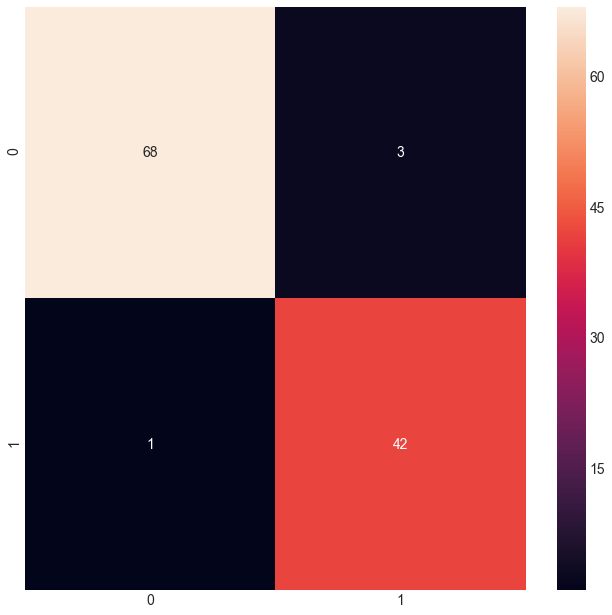

In [41]:
#Using Logistic Regression Classification method with default values

classifier_lr = LogisticRegression(random_state=42)      
classifier_lr = classifier_lr.fit(x_train,y_train)
y_pred = classifier_lr.predict(x_test)


lr_ac = accuracy_score(y_test,y_pred)
print('Accuracy: ',lr_ac)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

#evaluating the model using other performance metrics
print(classification_report(y_test, y_pred))

Note: 
A confusion matrix gives a complete picture of how the classifier is performing and allows us to compute various classification metrics. These metrics will guide our model selection later.

In [42]:
print(cm)

[[68  3]
 [ 1 42]]


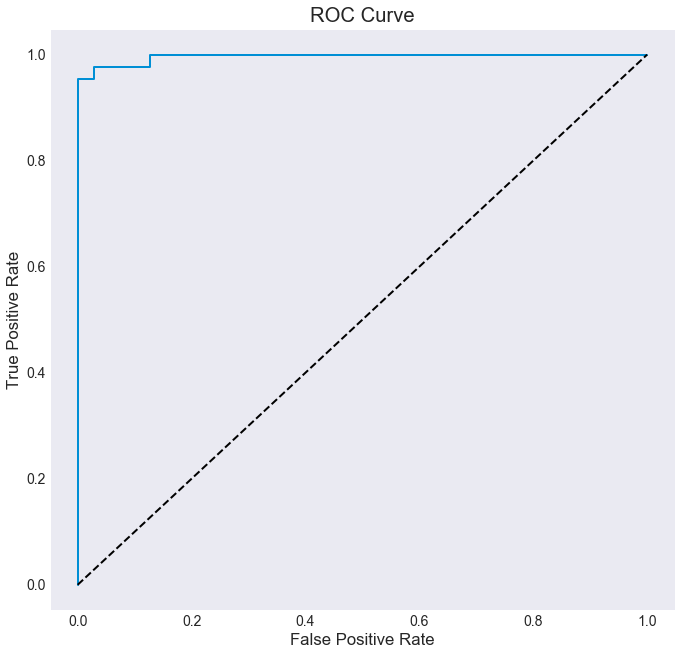

In [43]:
y_score = classifier_lr.decision_function(x_test)

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

Therefore, through Logistic Regression model, the accuracy comes out to be 96%.

Accuracy:  0.9385964912280702
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



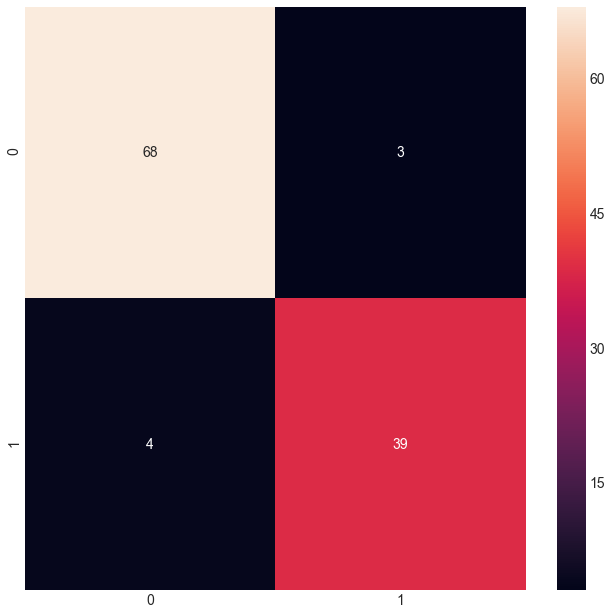

In [44]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm

classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)      
classifier_knn = classifier_knn.fit(x_train,y_train)
y_pred = classifier_knn.predict(x_test)

knn_ac = accuracy_score(y_test,y_pred)
print('Accuracy: ',knn_ac)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

#evaluating the model using other performance metrics
print(classification_report(y_test, y_pred))

Therefore, through KNeighbors classification model, the accuracy comes out to be 94%.

Accuracy:  0.9298245614035088
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        71
           1       0.93      0.88      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



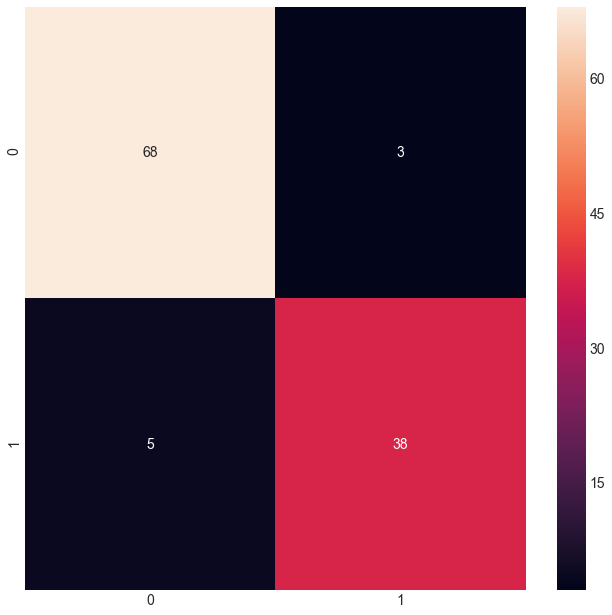

In [45]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm

classifier_gnb = GaussianNB()      
classifier_gnb = classifier_gnb.fit(x_train,y_train)
y_pred = classifier_gnb.predict(x_test)

gnb_ac = accuracy_score(y_test,y_pred)
print('Accuracy: ',gnb_ac)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

#evaluating the model using other performance metrics
print(classification_report(y_test, y_pred))

Therefore, through Naïve Bayes model, the accuracy comes out to be 93%.

Accuracy:  0.9649122807017544
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



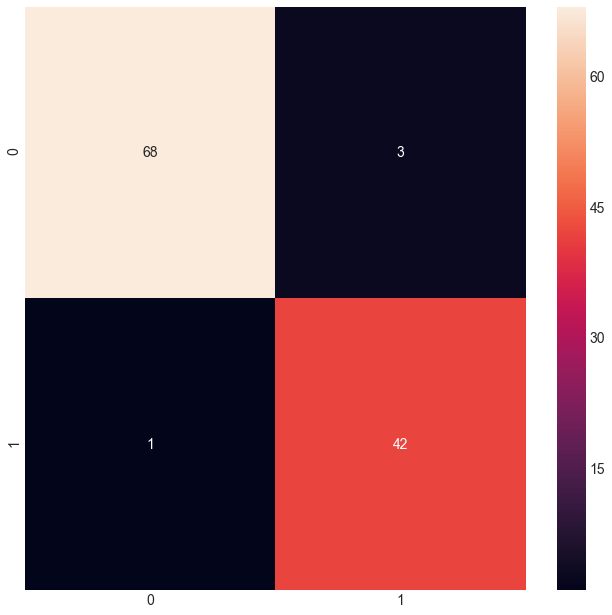

In [46]:
#Using SVM (Support Vector Machine)
#SVM can be used for both classification and regression for prediction
from sklearn import svm

classifier_svm = svm.SVC(kernel='linear')      
classifier_svm = classifier_svm.fit(x_train,y_train)
y_pred = classifier_svm.predict(x_test)

svm_ac = accuracy_score(y_test,y_pred)
print('Accuracy: ',svm_ac)

cm = confusion_matrix(y_test,classifier_svm.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

#evaluating the model using other performance metrics
print(classification_report(y_test, y_pred))

Accuracy through SVM is 96.5%.

Accuracy:  0.9824561403508771
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



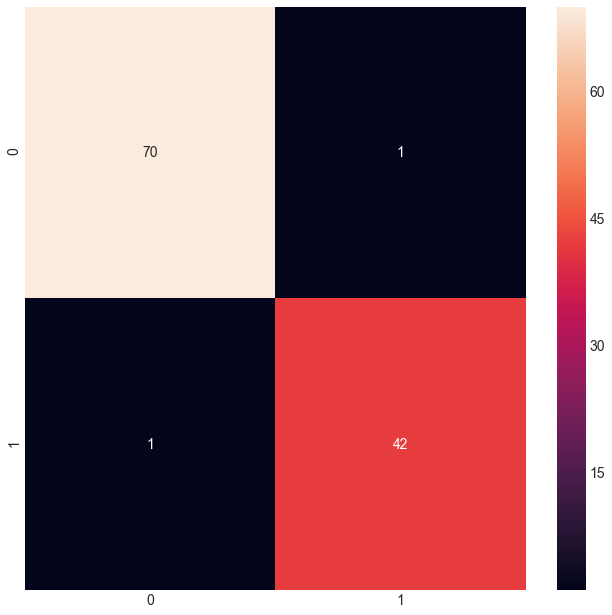

In [47]:
#Using XGBoost (eXtreme Gradient Boosting)
#This algorithm has a good execution speed, even on a large dataset and it has a good model performance.

classifier_xgb = XGBClassifier(random_state=42)      
classifier_xgb = classifier_xgb.fit(x_train,y_train)
y_pred = classifier_xgb.predict(x_test)

xgb_ac = accuracy_score(y_test,y_pred)
print('Accuracy: ',xgb_ac)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

#evaluating the model using other performance metrics
print(classification_report(y_test, y_pred))

So, the accuracy through eXtreme Gradient Boosting model comes out to be 98% at default values (which is again pretty high)

C:\Users\Gaurav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy:  0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



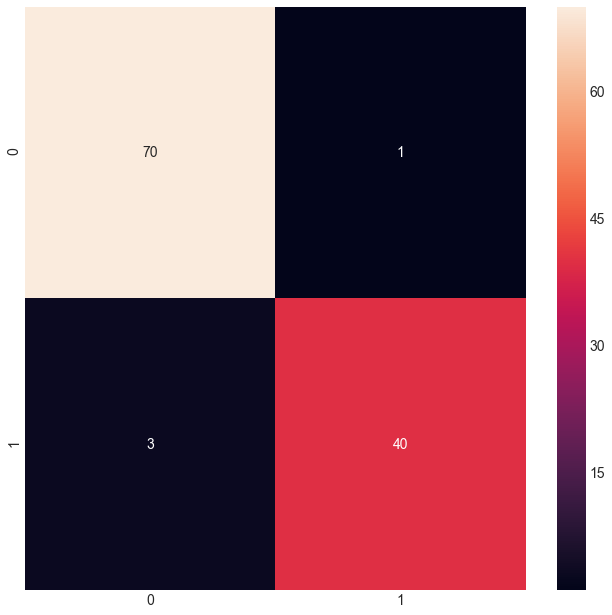

In [48]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
#random forest classifier with n_estimators=10 (default)
classifier_rf = RandomForestClassifier(random_state=42)      
classifier_rf = classifier_rf.fit(x_train,y_train)
y_pred = classifier_rf.predict(x_test)

rf_ac = accuracy_score(y_test,y_pred)
print('Accuracy: ',rf_ac)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

#evaluating the model using other performance metrics
print(classification_report(y_test, y_pred))

So, we see that the accuracy through Random Forest model comes out to be 96% at default values.

### Feature/ Variable Importance
#### Gini Importance / Mean Decrease Impurity (MDI)

In decision trees(random forest is a decision tree), every node is a condition of how to split values in a single feature, so that similar values of the dependent variable end up in the same set after the split. The condition is based on impurity, which in case of classification problems is Gini impurity/information gain (entropy), while for regression trees its variance. So when training a tree we can compute how much each feature contributes to decreasing the weighted impurity. In the case of Random Forest, we are talking about averaging the decrease in impurity over trees.    

##### 1) Random Forest 

In [49]:
importances_rf = classifier_rf.feature_importances_
indices_rf = np.argsort(importances_rf)
features = x.columns #names of the columns

In [50]:
print ("Variables sorted by their importace score:")
imp_var_rf =  (sorted(zip(map(lambda x: round(x, 4), importances_rf), features), 
             reverse=True))
imp_var_rf
#type(imp_var_rf) --list

Variables sorted by their importace score:


[(0.2436, 'area_mean'),
 (0.2016, 'area_se'),
 (0.1985, 'concavity_mean'),
 (0.0798, 'symmetry_worst'),
 (0.0528, 'texture_mean'),
 (0.0508, 'concavity_se'),
 (0.0383, 'fractal_dimension_se'),
 (0.0255, 'smoothness_worst'),
 (0.0221, 'symmetry_se'),
 (0.0203, 'fractal_dimension_worst'),
 (0.0155, 'fractal_dimension_mean'),
 (0.0148, 'smoothness_se'),
 (0.013, 'id'),
 (0.0092, 'smoothness_mean'),
 (0.0076, 'texture_se'),
 (0.0065, 'symmetry_mean')]

Now, plotting the Variable Importance on a bar graph

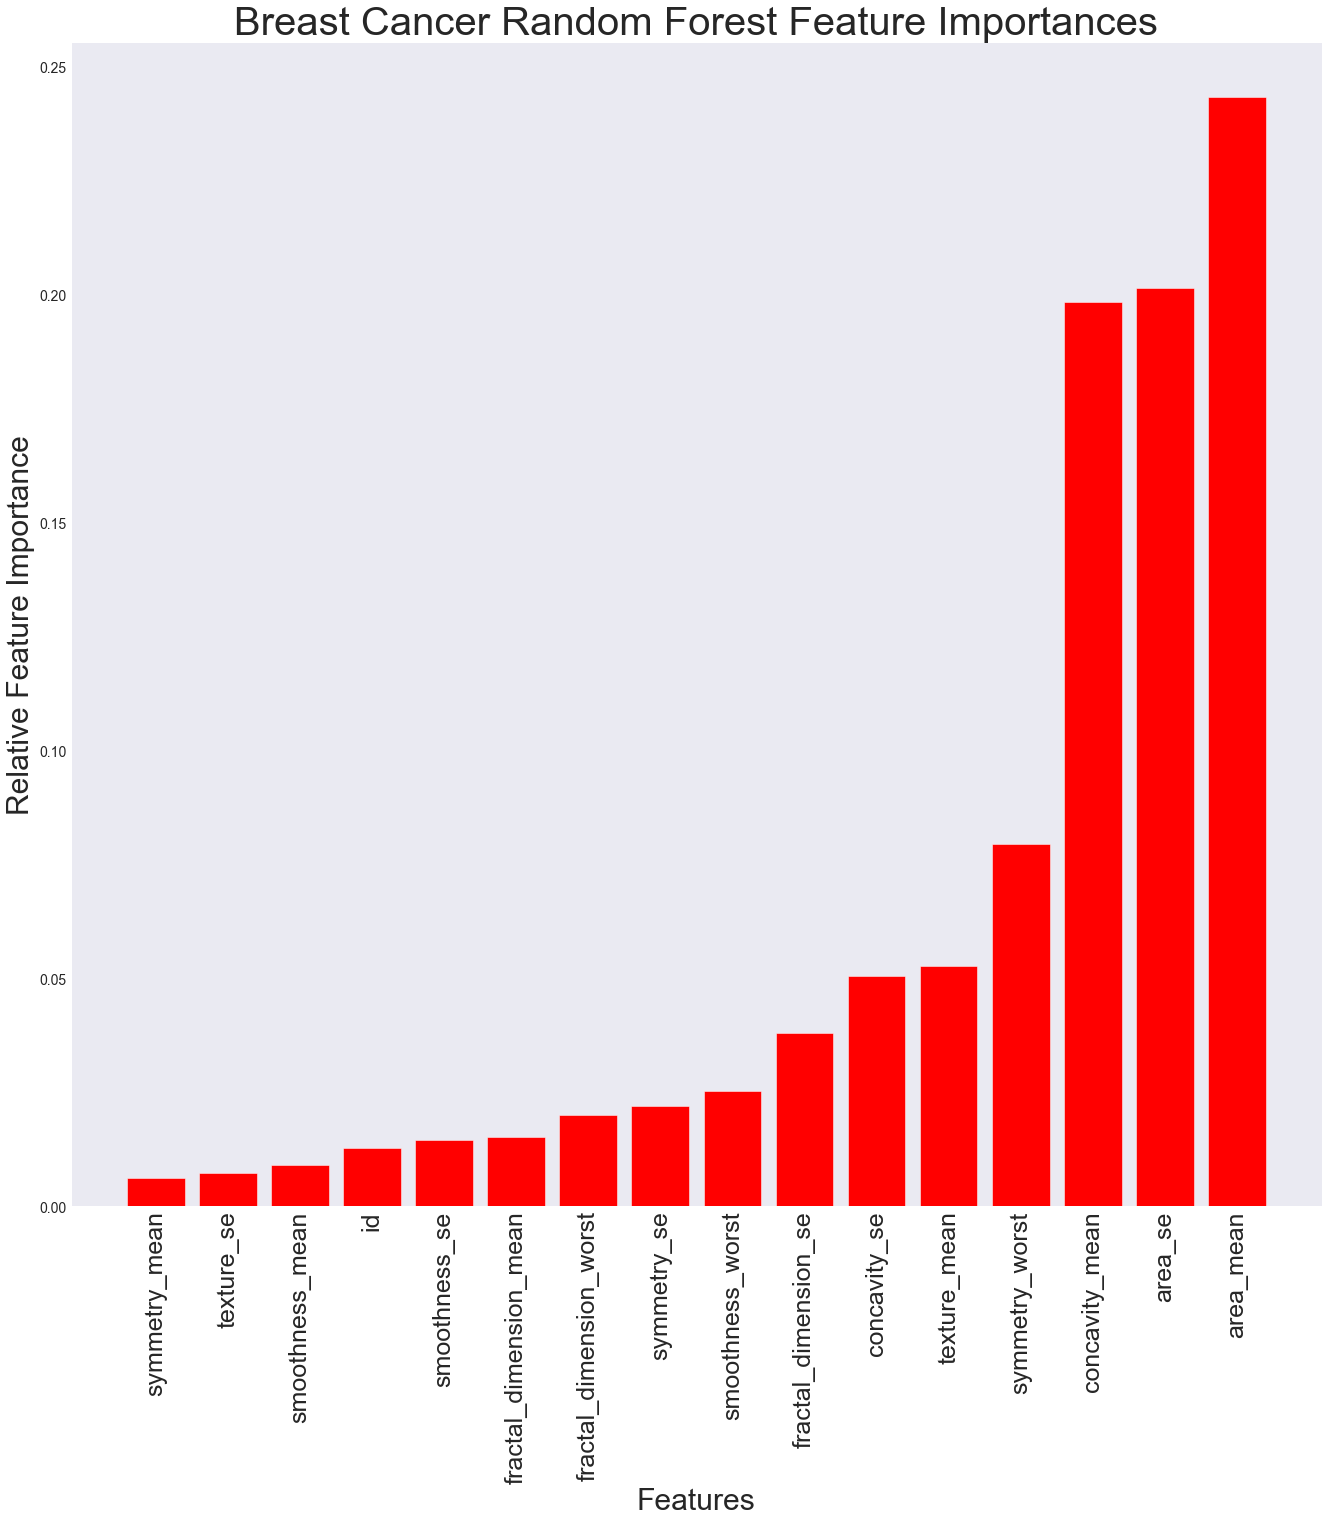

In [51]:
plt.figure(figsize=(20,20))
plt.title('Breast Cancer Random Forest Feature Importances', fontsize = 40)
plt.bar(range(len(indices_rf)), importances_rf[indices_rf], color='r', align='center')
plt.xticks(range(len(indices_rf)), features[indices_rf])
plt.ylabel('Relative Feature Importance', fontsize = 30)
plt.xlabel("Features", fontsize = 30)
plt.xticks(rotation = 90, fontsize = 25)
plt.show()

Here, we get the importance of each variable that contributes towards predicting the Malignant tumors. 
#### RESULT
Top 5 predictors for Malignant tumors according to Random Forest are:
<b>area_mean</b>, <b>concavity_mean</b>, <b>symmetry_worst</b>, <b>area_se</b>, and <b>texture_mean</b>.

We can verify this by using feature importance on another classifier like, XGBoost.

##### 2) XGBoost

In [52]:
importances_xgb = classifier_xgb.feature_importances_
indices_xgb = np.argsort(importances_xgb)

print ("Variables sorted by their importace score:")
imp_var_xgb =  (sorted(zip(map(lambda x: round(x, 4), importances_xgb), features), 
             reverse=True))
imp_var_xgb

Variables sorted by their importace score:


[(0.2913, 'area_mean'),
 (0.2698, 'concavity_mean'),
 (0.0817, 'smoothness_worst'),
 (0.0604, 'area_se'),
 (0.0532, 'fractal_dimension_se'),
 (0.0515, 'symmetry_worst'),
 (0.0442, 'texture_mean'),
 (0.0334, 'smoothness_se'),
 (0.0253, 'id'),
 (0.0219, 'symmetry_se'),
 (0.0142, 'smoothness_mean'),
 (0.014, 'concavity_se'),
 (0.0131, 'fractal_dimension_mean'),
 (0.0106, 'fractal_dimension_worst'),
 (0.0101, 'symmetry_mean'),
 (0.0054, 'texture_se')]

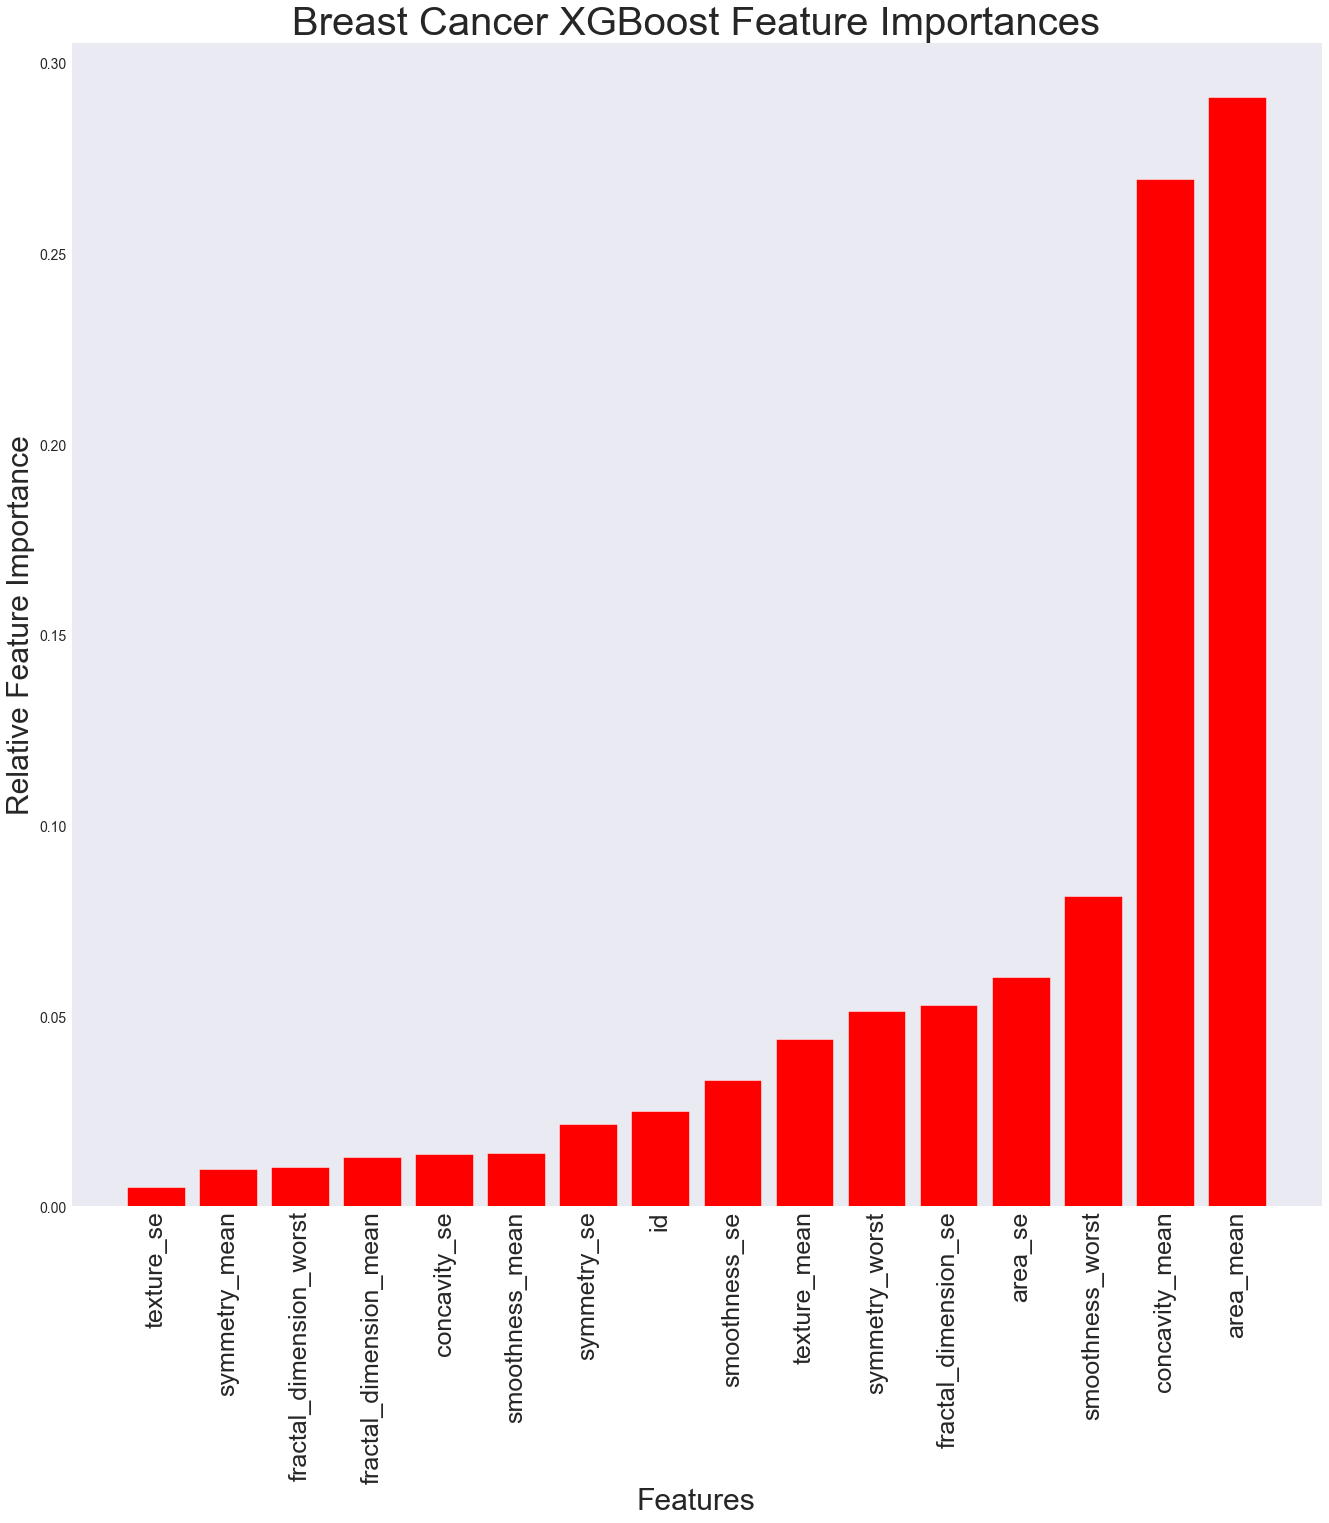

In [53]:
plt.figure(figsize=(20,20))
plt.title('Breast Cancer XGBoost Feature Importances', fontsize = 40)
plt.bar(range(len(indices_xgb)), importances_xgb[indices_xgb], color='r', align='center')
plt.xticks(range(len(indices_xgb)), features[indices_xgb])
plt.ylabel('Relative Feature Importance', fontsize = 30)
plt.xlabel("Features", fontsize = 30)
plt.xticks(rotation = 90, fontsize = 25)
plt.show()

#### RESULT
The top 5 predictors of a cancerous (Malignant) tumor come out to be the same with XGBoost classifier as well, i.e. <b>area_mean</b>, <b>concavity_mean</b>, <b>fractal_dimension_se</b>, <b>area_se</b>, and <b>smoothness_worst</b>. 

Note:

Now that we have 6 Base Line Models which gave us different accuracy for the dataset in each case, we will try to improve the performance of our models and get a realistic value by first: 

1) checking if our model is unbiased towards the data by cross-validation

2) Performing Hyper Parameter Tuning: every model has its own parameters, when you dont mention the parameters it by default takes the default parameters. So  here, we  specifically mention the parameters we use so that the default parameters are ignored.

This will help us in training the models better in order to increase their performance and accuracy, along with other factors like Precision and Recall 
(After that, we will combine all the models and get the best accuracy for our dataset, alot weighs to the models, which gives the best analysis for our data in predicting Malignant and Benign Cancel tumors.)

Note: Hyperparameter tuning relies more on experimental results than theoretical, and thus the best method to find the optimal parameters is to try different combinations that evaluate the performance of each model. However, evaluating each model only on the training set can lead to one of the most fundamental problems in machine learning: overfitting.
If we optimize the model for the training data, then our model will score very well on the training set, but will not be able to generalize to new data, such as in a test set. This is overfitting, or generally speaking, creating a model that knows the training set very well but cannot be applied to real problems. Therefore, the standard procedure for hyperparameter optimization takes care of overfitting through cross validation.



#### 1) Random Forest with Hyper-Parameter Tuning (Random Search Cross-Validation)

Checking for bias in our data to be sure; cross-validation handles overfitting and underfitting and helps maximize the model performance while reducing the chances of overfitting.

Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

In [54]:
# looking at parameters used as default by current randomforest

print('Parameters used currently:')

pprint(classifier_rf.get_params())

Parameters used currently:
{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [55]:
#Random Hyperparameter Grid (we need to create a parameter grid to sample from during fittig, in order to use RandomizedSearchCV)

from sklearn.model_selection import RandomizedSearchCV

# Create the random grid
random_grid = {# Quality of split
               'criterion':['gini','entropy'],
               # Number of trees in random forest
               'n_estimators': [10,15,20,25,30],
               # Maximum number of levels in tree
               'max_depth': [5,10,20],
               # Minimum number of samples required to split a node
               'min_samples_split': [2,3,4,5],
               # Minimum number of samples required at each leaf node
               'min_samples_leaf': [1,2,3],
               # Controls both the randomness of the bootstrapping of the samples used when building trees, and the sampling of the features to consider when looking for the best split at each node
               # a "seed" so that the value doesn't change when run later
               # random number generator generates the same sequence of random integers each time, which in turn has an effect on the way your data is sampled.
               # enables us to get consistent results
               'random_state': [42] }
pprint(random_grid)

{'criterion': ['gini', 'entropy'],
 'max_depth': [5, 10, 20],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [2, 3, 4, 5],
 'n_estimators': [10, 15, 20, 25, 30],
 'random_state': [42]}


In [56]:
#Making models with hyper parameters sets and training them with 10 folds (cv = 10)
model_rf = GridSearchCV(classifier_rf, param_grid=random_grid, cv = 10, n_jobs = -1)

model_rf.fit(x_train,y_train)

#The best hyper parameters set
print("Best Hyper Parameters:",model_rf.best_params_)

Best Hyper Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 25, 'random_state': 42}


C:\Users\Gaurav\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy:  0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



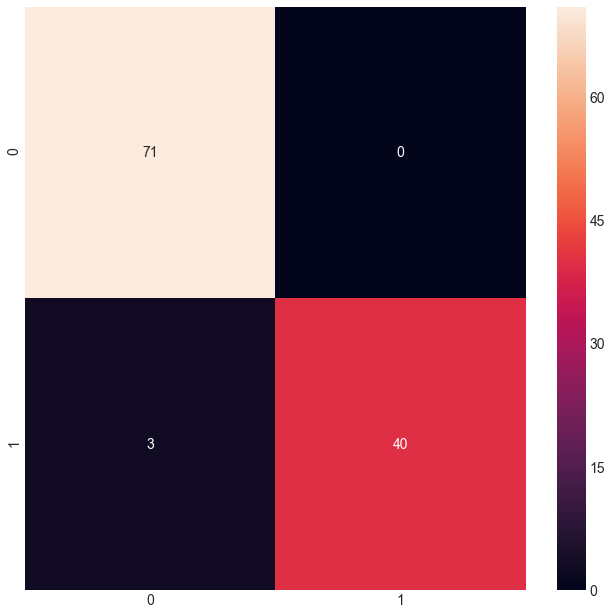

In [57]:
#Prediction
y_pred_rf = model_rf.predict(x_test)

#evaluation(Accuracy)
new_rf_ac = accuracy_score(y_test,y_pred_rf)
print('Accuracy: ',new_rf_ac)

#evaluation(Confusion Metrix)
cm = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot=True,fmt="d")

#evaluating the model using other performance metrics
print(classification_report(y_test, y_pred_rf))

In [58]:
print ('RESULT')
print ('Improvement in new RandomForest model when compared to the base RandomForest model: {:0.2f}%.'.format( 100 * (new_rf_ac - rf_ac) / rf_ac))

RESULT
Improvement in new RandomForest model when compared to the base RandomForest model: 0.91%.


Therefore, RandomForest model accuracy improved 0.91% when we ran it with the best parameters.

In [59]:
y_pred_rf

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [60]:
# Getting the probabilities of each data point with this classifier, each value here signifies the probability of  Malignant or Benign classification, depending on the prediction array for the classifier

np.set_printoptions(suppress=True) #prevent numpy exponential, default is False
rf_prob = model_rf.predict_proba(x_test)
rf_scores = rf_prob[:,1]
rf_scores

array([0.        , 0.94      , 0.96      , 0.        , 0.        ,
       1.        , 1.        , 0.84      , 0.4       , 0.12      ,
       0.16      , 0.92      , 0.09333333, 1.        , 0.08      ,
       0.96      , 0.05333333, 0.        , 0.        , 1.        ,
       0.2       , 0.04      , 1.        , 0.        , 0.        ,
       0.1       , 0.04      , 0.04      , 0.        , 1.        ,
       0.08      , 0.        , 0.32      , 0.04      , 0.02      ,
       0.        , 0.64      , 0.        , 1.        , 0.08      ,
       0.        , 0.96      , 0.04      , 0.        , 0.26      ,
       0.09      , 0.33333333, 0.        , 0.04      , 0.04      ,
       0.98      , 1.        , 0.4       , 0.36      , 0.12      ,
       0.02      , 0.        , 1.        , 0.65      , 0.        ,
       0.        , 1.        , 1.        , 0.21      , 0.        ,
       0.22      , 1.        , 1.        , 0.04      , 0.12      ,
       0.78      , 0.96      , 0.        , 0.96      , 0.     

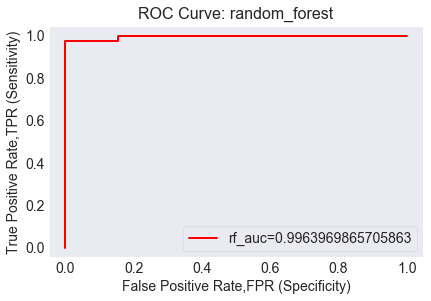

In [61]:
# ROC plot and AUC (area under the curve) for Random Forest

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test,  rf_scores)
auc = metrics.roc_auc_score(y_test, rf_scores)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,linewidth=2,label="rf_auc="+str(auc), color='r')
plt.xlabel('False Positive Rate,FPR (Specificity)', fontsize=14)
plt.ylabel('True Positive Rate,TPR (Sensitivity)', fontsize=14)
plt.title('ROC Curve: random_forest', fontsize=16)
plt.legend(loc=4)
plt.show()


In [62]:
# the precision-recall curve

from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_test, rf_scores) #for RF

In [63]:
#function to plot the precision-recall curve with threshold

def precision_recall_threshold(precisions, recalls, thresholds, model):
    plt.figure(figsize=(6, 6))
    plt.title("Precision-Recall Scores as a function of decision threshold of" + " " + (model), fontsize=16)
    plt.plot(thresholds, precisions[:-1], "y-", label="Precision")
    plt.plot(thresholds, recalls[:-1], "r--", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')


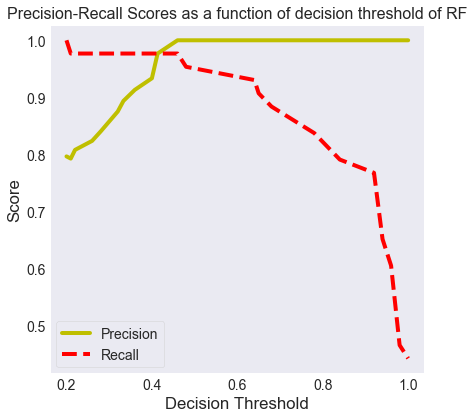

In [64]:
#calling the function above to make the precision-recall curve for random forest
precision_recall_threshold(p, r, thresholds, "RF")

In [65]:
#adding the random forest predictions array and probabilities to the new dataframe that has to be exported to excle later for dashboard

df_xl["rf_pred"] = y_pred_rf

df_xl["rf_prob"] = rf_prob[:,1]

df_xl.head(10)

,id,diagnosis,rf_pred,rf_prob
0,87930,0,0,0.00
1,859575,1,1,0.94
2,8670,1,1,0.96
3,907915,0,0,0.00
4,921385,0,0,0.00
5,927241,1,1,1.00
6,9012000,1,1,1.00
7,853201,1,1,0.84
8,8611161,0,0,0.40
9,911673,0,0,0.12


#### 2) XGBoost with Hyper-Parameter Tuning

In [66]:
# looking at parameters used as default by current XGBoost classifier

print('Parameters used currently:')

pprint(classifier_xgb.get_params())

Parameters used currently:
{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}


In [67]:
#Hyperparameter Grid

# Create the random grid
random_grid = {# minimum sum of weights of all observations required in a child
               'min_child_weight': [1,2,3],
               # Maximum depth of a tree
               'max_depth': [4,5,6],
               # Metric to be used for validation data
               'eval_metric': ['rmse', 'error', 'auc'],
               # Minimum number of samples required at each leaf node
               'num_of_trees': [1,2,3],
               'random_state': [42]}
pprint(random_grid)

{'eval_metric': ['rmse', 'error', 'auc'],
 'max_depth': [4, 5, 6],
 'min_child_weight': [1, 2, 3],
 'num_of_trees': [1, 2, 3],
 'random_state': [42]}


In [68]:
#Making models with hyper parameters sets
model_xgb = GridSearchCV(classifier_xgb, param_grid=random_grid, cv = 10, n_jobs = -1)

model_xgb.fit(x_train,y_train)

#The best hyper parameters set
print("Best Hyper Parameters:",model_xgb.best_params_)

C:\Users\Gaurav\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Hyper Parameters: {'eval_metric': 'rmse', 'max_depth': 4, 'min_child_weight': 2, 'num_of_trees': 1, 'random_state': 42}


Accuracy:  0.9824561403508771
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



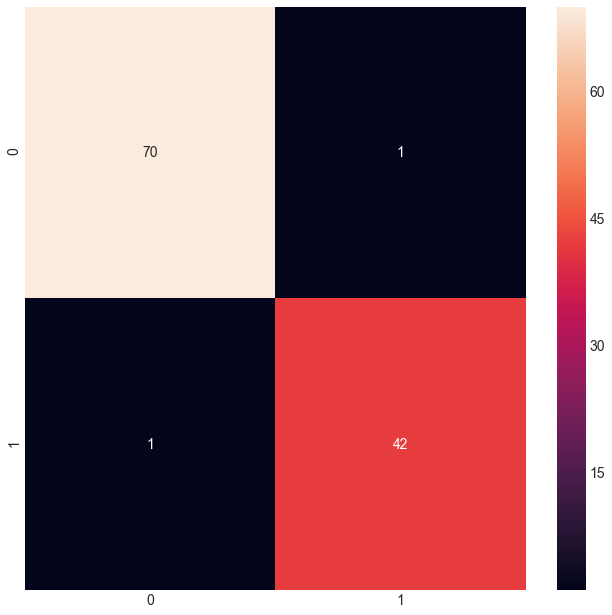

In [69]:
#Prediction
y_pred_xgb = model_xgb.predict(x_test)

#evaluation(Accuracy)
new_xgb_ac = accuracy_score(y_test,y_pred_xgb)
print('Accuracy: ',new_xgb_ac)

#evaluation(Confusion Metrix)
cm = confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(cm,annot=True,fmt="d")

#evaluating the model using other performance metrics
print(classification_report(y_test, y_pred_xgb))

In [70]:
print ('RESULT')
print ('Improvement in new XGBoost model when compared to the base XGBoost model: {:0.2f}%.'.format( 100 * (new_xgb_ac - xgb_ac) / xgb_ac))

RESULT
Improvement in new XGBoost model when compared to the base XGBoost model: 0.00%.


Therefore, XGBoost model accuracy remained the same when ran with the best parameters

In [71]:
np.set_printoptions(suppress=True) #prevent numpy exponential, default is False
xgb_prob = model_xgb.predict_proba(x_test)
xgb_scores = xgb_prob[:,1]
xgb_scores

array([0.15624113, 0.9974234 , 0.99831045, 0.00375389, 0.00074325,
       0.9966534 , 0.9967007 , 0.85464096, 0.4592735 , 0.00357674,
       0.00860255, 0.9636496 , 0.00342988, 0.9954033 , 0.00262965,
       0.9837847 , 0.00144153, 0.0013449 , 0.00296225, 0.9974252 ,
       0.04262896, 0.00459736, 0.9989911 , 0.00545286, 0.0120074 ,
       0.00405244, 0.00161921, 0.005173  , 0.00143387, 0.99858284,
       0.00737583, 0.00449759, 0.09815363, 0.00155191, 0.00286517,
       0.00390556, 0.9765885 , 0.0020056 , 0.99869007, 0.19688518,
       0.00635409, 0.98853326, 0.00128044, 0.00189233, 0.03784735,
       0.10000277, 0.01244907, 0.00324839, 0.03626136, 0.00578736,
       0.99906105, 0.9992167 , 0.3573022 , 0.22368552, 0.00297236,
       0.00202961, 0.00134686, 0.9909601 , 0.89342475, 0.00146348,
       0.00161121, 0.998251  , 0.995793  , 0.02687638, 0.00120704,
       0.01975216, 0.9985044 , 0.99536574, 0.00431797, 0.03930856,
       0.987874  , 0.9904117 , 0.00184065, 0.9978258 , 0.00656

In [72]:
y_pred_xgb

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

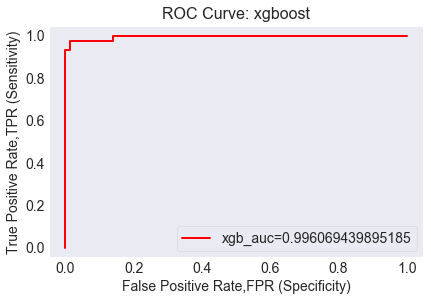

In [73]:
# ROC plot and AUC (area under the curve) for XGBoost

fpr, tpr, _ = metrics.roc_curve(y_test,  xgb_scores)
auc = metrics.roc_auc_score(y_test, xgb_scores)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,linewidth=2,label="xgb_auc="+str(auc), color='r')
plt.xlabel('False Positive Rate,FPR (Specificity)', fontsize=14)
plt.ylabel('True Positive Rate,TPR (Sensitivity)', fontsize=14)
plt.title('ROC Curve: xgboost', fontsize=16)
plt.legend(loc=4)
plt.show()

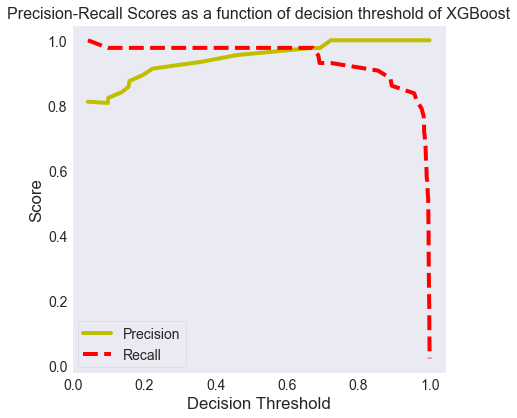

In [74]:
# the precision-recall curve

p, r, thresholds = precision_recall_curve(y_test, xgb_scores) #for XGBoost

#calling the function we made before to make the precision-recall curve for xgboost

precision_recall_threshold(p, r, thresholds, "XGBoost")

In [75]:
#adding the XGBoost predictions array and probabilities to the new dataframe that has to be exported to excle later for dashboard

df_xl["xgb_pred"] = y_pred_xgb

df_xl["xgb_prob"] = xgb_prob[:,1]

df_xl.head(10)

,id,diagnosis,rf_pred,rf_prob,xgb_pred,xgb_prob
0,87930,0,0,0.00,0,0.156241
1,859575,1,1,0.94,1,0.997423
2,8670,1,1,0.96,1,0.998310
3,907915,0,0,0.00,0,0.003754
4,921385,0,0,0.00,0,0.000743
5,927241,1,1,1.00,1,0.996653
6,9012000,1,1,1.00,1,0.996701
7,853201,1,1,0.84,1,0.854641
8,8611161,0,0,0.40,0,0.459273
9,911673,0,0,0.12,0,0.003577


#### 3) Logistic Regression with Hyper Parameter Tuning

In [76]:
# looking at parameters used as default by current Logistic Regression classifier
print('Parameters used currently:')

pprint(classifier_lr.get_params())

Parameters used currently:
{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [77]:
#Hyperparameter Grid

# Create the random grid
random_grid = {# Used to specify the norm used in the penalization
               'penalty':['l1','l2'],
               # Algorithm to use in the optimization problem
               'solver': ['liblinear', 'warn'],
               # Maximum number of iterations taken for the solvers to converge
               'max_iter': [4,5,6,7,8,9,10],
               # showing more wordy information for the task, higher number means we'll see more information 
               'verbose': [0,1,2]}
pprint(random_grid)

{'max_iter': [4, 5, 6, 7, 8, 9, 10],
 'penalty': ['l1', 'l2'],
 'solver': ['liblinear', 'warn'],
 'verbose': [0, 1, 2]}


In [78]:
#Making models with hyper parameters sets
model_lr = GridSearchCV(classifier_lr, param_grid=random_grid, cv = 10, n_jobs = -1)

model_lr.fit(x_train,y_train)

#The best hyper parameters set
print("Best Hyper Parameters:",model_lr.best_params_)

Best Hyper Parameters: {'max_iter': 4, 'penalty': 'l1', 'solver': 'liblinear', 'verbose': 0}


C:\Users\Gaurav\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Gaurav\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy:  0.9736842105263158
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



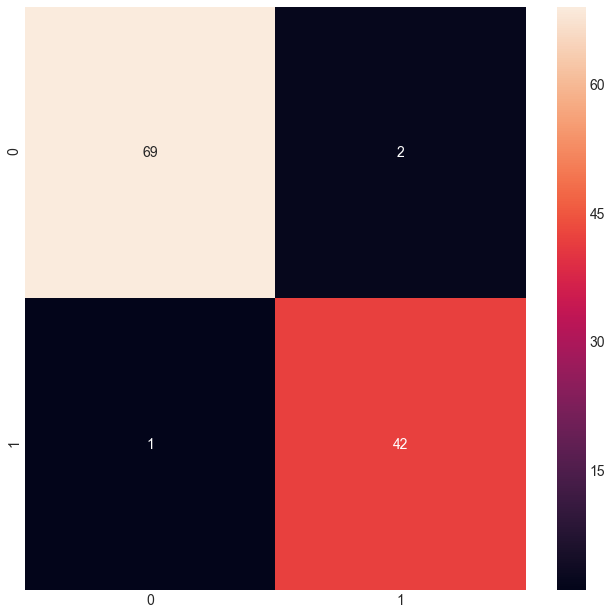

In [79]:
#Prediction
y_pred_lr = model_lr.predict(x_test)

#evaluation(Accuracy)
new_lr_ac = accuracy_score(y_test,y_pred_lr)
print('Accuracy: ',new_lr_ac)

#evaluation(Confusion Metrix)
cm = confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm,annot=True,fmt="d")

#evaluating the model using other performance metrics
print(classification_report(y_test, y_pred_lr))

In [80]:
print ('RESULT')
print ('Improvement in new Logistic Regression when compared to the base model: {:0.2f}%.'.format( 100 * (new_lr_ac - lr_ac) / lr_ac))

RESULT
Improvement in new Logistic Regression when compared to the base model: 0.91%.


Therefore, Logistic Regression model accuracy improved 0.91% when we ran it with the best parameters.

In [81]:
np.set_printoptions(suppress=True) #prevent numpy exponential, default is False
lr_prob = model_lr.predict_proba(x_test)
#lr_prob
lr_scores = lr_prob[:,1]
lr_scores

array([0.21674203, 0.99876057, 0.96212402, 0.0166371 , 0.00329609,
       0.99999975, 0.99999803, 0.84138993, 0.23254615, 0.00901827,
       0.15398158, 0.86404871, 0.0411148 , 0.84377493, 0.01578023,
       0.98842311, 0.0152891 , 0.00145013, 0.00062611, 0.99984155,
       0.16610599, 0.07056531, 0.99999673, 0.00296987, 0.01235376,
       0.0077637 , 0.01231057, 0.04015897, 0.02882618, 0.99973353,
       0.01076396, 0.00373956, 0.01626872, 0.05683619, 0.00627945,
       0.01880211, 0.80829342, 0.0040308 , 0.99489047, 0.18065348,
       0.00465404, 0.98832907, 0.02521884, 0.01713588, 0.02621733,
       0.23851043, 0.01562018, 0.00659283, 0.20564391, 0.00443212,
       0.9943256 , 0.99998749, 0.62382279, 0.04852438, 0.00187268,
       0.03268344, 0.00300892, 0.99999996, 0.64796529, 0.00443426,
       0.04534871, 0.99994851, 0.99999937, 0.1326091 , 0.00834441,
       0.22329792, 0.99934399, 0.99999792, 0.01338053, 0.14254752,
       0.94501931, 0.97563141, 0.01015629, 0.93839396, 0.00397

In [82]:
y_pred_lr

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

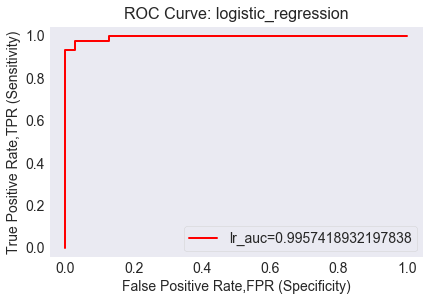

In [83]:
# ROC plot and AUC (area under the curve) for Logistic Regression

fpr, tpr, _ = metrics.roc_curve(y_test,  lr_scores)
auc = metrics.roc_auc_score(y_test, lr_scores)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,linewidth=2,label="lr_auc="+str(auc), color='r')
plt.xlabel('False Positive Rate,FPR (Specificity)', fontsize=14)
plt.ylabel('True Positive Rate,TPR (Sensitivity)', fontsize=14)
plt.title('ROC Curve: logistic_regression', fontsize=16)
plt.legend(loc=4)
plt.show()

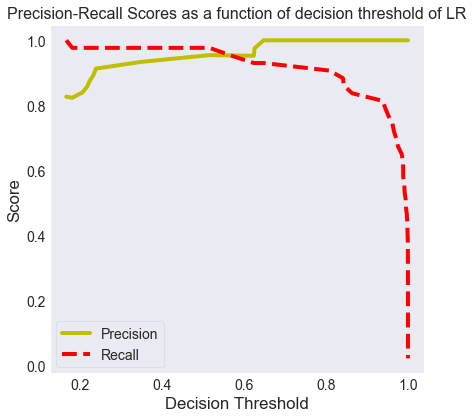

In [84]:
# the precision-recall curve

p, r, thresholds = precision_recall_curve(y_test, lr_scores) #for LR

#calling the function we made before to make the precision-recall curve for logistic regression

precision_recall_threshold(p, r, thresholds, "LR")

In [85]:
#adding the random forest predictions array and probabilities to the new dataframe that has to be exported to excle later for dashboard
pd.options.display.float_format = '{:.2f}'.format
df_xl["lr_pred"] = y_pred_lr

df_xl["lr_prob"] = lr_prob[:,1]

df_xl.head(10)

,id,diagnosis,rf_pred,rf_prob,xgb_pred,xgb_prob,lr_pred,lr_prob
0,87930,0,0,0.00,0,0.16,0,0.22
1,859575,1,1,0.94,1,1.00,1,1.00
2,8670,1,1,0.96,1,1.00,1,0.96
3,907915,0,0,0.00,0,0.00,0,0.02
4,921385,0,0,0.00,0,0.00,0,0.00
5,927241,1,1,1.00,1,1.00,1,1.00
6,9012000,1,1,1.00,1,1.00,1,1.00
7,853201,1,1,0.84,1,0.85,1,0.84
8,8611161,0,0,0.40,0,0.46,0,0.23
9,911673,0,0,0.12,0,0.00,0,0.01


#### Exporting the dataframe to Excel for final Dashboard and Report

In [86]:
df_xl.to_excel("BreastCancer.xlsx")  

In [87]:
df_xl2 = pd.DataFrame(imp_var_rf) # imp_var_rf has the important variables list and importances in a list from RF classifier
df_xl2

,0,1
0,0.24,area_mean
1,0.20,area_se
2,0.20,concavity_mean
3,0.08,symmetry_worst
4,0.05,texture_mean
5,0.05,concavity_se
6,0.04,fractal_dimension_se
7,0.03,smoothness_worst
8,0.02,symmetry_se
9,0.02,fractal_dimension_worst


In [88]:
df_xl2.rename(columns = {0:'imp_var_rf', 1:'variable_name'}, inplace = True)
df_xl2

,imp_var_rf,variable_name
0,0.24,area_mean
1,0.20,area_se
2,0.20,concavity_mean
3,0.08,symmetry_worst
4,0.05,texture_mean
5,0.05,concavity_se
6,0.04,fractal_dimension_se
7,0.03,smoothness_worst
8,0.02,symmetry_se
9,0.02,fractal_dimension_worst


In [89]:
df_xl3 = pd.DataFrame(imp_var_xgb) # imp_var_xgb has the important variables list and importances in a list from XGBoost classifier
df_xl3
df_xl3.rename(columns = {0:'imp_var_xgb', 1:'variable_name'}, inplace = True)
df_xl3

,imp_var_xgb,variable_name
0,0.29,area_mean
1,0.27,concavity_mean
2,0.08,smoothness_worst
3,0.06,area_se
4,0.05,fractal_dimension_se
5,0.05,symmetry_worst
6,0.04,texture_mean
7,0.03,smoothness_se
8,0.03,id
9,0.02,symmetry_se


In [90]:
df_xl_new = pd.merge(df_xl2, df_xl3[['imp_var_xgb','variable_name']], on='variable_name')
df_xl_new.head()

,imp_var_rf,variable_name,imp_var_xgb
0,0.24,area_mean,0.29
1,0.20,area_se,0.06
2,0.20,concavity_mean,0.27
3,0.08,symmetry_worst,0.05
4,0.05,texture_mean,0.04


In [91]:
# Exporting the other two dataframes containing FR and XGBoost Feature Importances to an Excel sheet

df_xl_new.to_excel("FeatureImp.xlsx")    

### Ensembling Models

Ensemble methods help to improve the machine learning results by combining the decisions from multiple models to improve the overall performance of the data prediction, as compared to a single model. There are various ensembling techniques like: Max Voting, Weighted Average, Stacking, Bagging, Boosting, etc. I am going to use one of the methods, Max Voting.

#### Max Voting

This method is generally used for classification problems. Here, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’, and the ones which we get from the majority of the models are used as the final prediction.

In [92]:
import statistics

model1 = RandomForestClassifier()
model2 = XGBClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict(x_test)
pred2=model2.predict(x_test)
pred3=model3.predict(x_test)

final_pred = np.array([])
for i in range(0,len(x_test)):
    final_pred = np.append(final_pred, statistics.mode([pred1[i], pred2[i], pred3[i]]))
    
pprint(final_pred)

C:\Users\Gaurav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Gaurav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.])


The array above shows the max voting prections for the three models I trained above: Random Forest, XGBoost and Logistic Regression, and their max voting trends, to get the final prediction array for each data point in th test set. The data points are either Malignant (1) or Benign (0), from the three predicting models. Next, I show the final prediction from the 3 trained models combined through a confusion matrix.

In [93]:
len(final_pred) #length of our test set

114

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



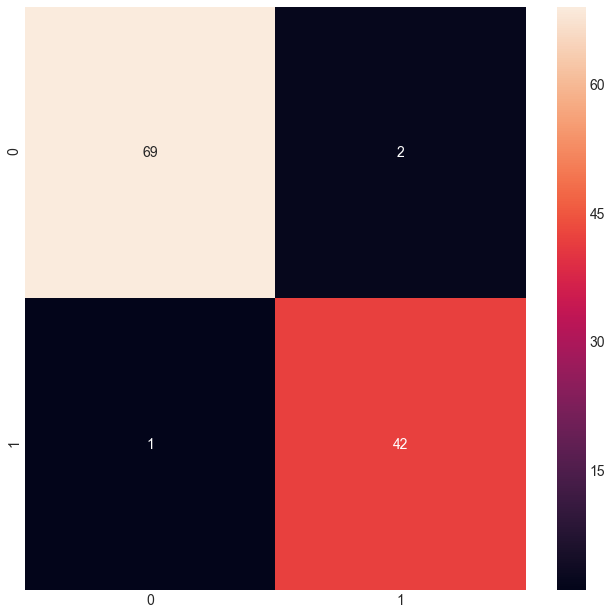

In [94]:
#getting confusion matrix for the final prediction we got through max voting ensembling method above

sns.heatmap(cm,annot=True,fmt="d")

#evaluating the model using other performance metrics
print(classification_report(y_test, final_pred))

Therefore, the final accuracy after ensembling the 3 models is 98%. 

#### Final Note:

See the Dashboard attached with this python notebook to visually see and better understand the deduced results. 